Task: Our task is to predict the region and The Average Price. One of Classification and other of Regression

In [4]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler, Preprocessor, 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('avocado.csv')

df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

a. Data Inspection:

In [6]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [7]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

b. Data Description:

In [8]:
# Checking the dimension of data
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))
print('\n')
# Checking the column names in our dataframe
print('Columns in our dataframe are:\n', df.columns)

We have 18249 rows and 14 columns in our dataframe


Columns in our dataframe are:
 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [9]:
# Renaming few columns
df.rename(columns={'4046':'Small(4046)','4225':'Large(4225)','4770':'Extra_Large(4770)'},inplace=True)
df

Unnamed: 0        Date  AveragePrice  Total Volume  Small(4046)  \
0               0  2015-12-27          1.33      64236.62      1036.74   
1               1  2015-12-20          1.35      54876.98       674.28   
2               2  2015-12-13          0.93     118220.22       794.70   
3               3  2015-12-06          1.08      78992.15      1132.00   
4               4  2015-11-29          1.28      51039.60       941.48   
...           ...         ...           ...           ...          ...   
18244           7  2018-02-04          1.63      17074.83      2046.96   
18245           8  2018-01-28          1.71      13888.04      1191.70   
18246           9  2018-01-21          1.87      13766.76      1191.92   
18247          10  2018-01-14          1.93      16205.22      1527.63   
18248          11  2018-01-07          1.62      17489.58      2894.77   

       Large(4225)  Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
0         54454.85              48.16     8696.87     8603.62       93.25   
1         44638.81              58.33     9505.56     9408.07       97.49   
2        109149.67             130.50     8145.35     8042.21      103.14   
3         71976.41              72.58     5811.16     5677.40      133.76   
4         43838.39              75.78     6183.95     5986.26      197.69   
...            ...                ...         ...         ...         ...   
18244      1529.20               0.00    13498.67    13066.82      431.85   
18245      3431.50               0.00     9264.84     8940.04      324.80   
18246      2452.79             727.94     9394.11     9351.80       42.31   
18247      2981.04             727.01    10969.54    10919.54       50.00   
18248      2356.13             224.53    12014.15    11988.14       26.01   

       XLarge Bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Observations:

We have 18249 rows and 14 columns in our dataframe
We have renamed 3 columns for our convenience to get more insights about those columns

c. Understand Data Types:

In [10]:
# Checking data datatypes
df.dtypes

Unnamed: 0             int64
Date                  object
AveragePrice         float64
Total Volume         float64
Small(4046)          float64
Large(4225)          float64
Extra_Large(4770)    float64
Total Bags           float64
Small Bags           float64
Large Bags           float64
XLarge Bags          float64
type                  object
year                   int64
region                object
dtype: object

In [11]:
# Understanding data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         18249 non-null  int64  
 1   Date               18249 non-null  object 
 2   AveragePrice       18249 non-null  float64
 3   Total Volume       18249 non-null  float64
 4   Small(4046)        18249 non-null  float64
 5   Large(4225)        18249 non-null  float64
 6   Extra_Large(4770)  18249 non-null  float64
 7   Total Bags         18249 non-null  float64
 8   Small Bags         18249 non-null  float64
 9   Large Bags         18249 non-null  float64
 10  XLarge Bags        18249 non-null  float64
 11  type               18249 non-null  object 
 12  year               18249 non-null  int64  
 13  region             18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
# Changing Date columns Datatype and creat separate columns for each

df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for year, month, and day
#df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [13]:
#Dropping Unnamed column as it is contains the index number or the serial numbers
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)


#Checking the dimension of the data after dropping the column
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))

We have 18249 rows and 14 columns in our dataframe


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AveragePrice       18249 non-null  float64
 1   Total Volume       18249 non-null  float64
 2   Small(4046)        18249 non-null  float64
 3   Large(4225)        18249 non-null  float64
 4   Extra_Large(4770)  18249 non-null  float64
 5   Total Bags         18249 non-null  float64
 6   Small Bags         18249 non-null  float64
 7   Large Bags         18249 non-null  float64
 8   XLarge Bags        18249 non-null  float64
 9   type               18249 non-null  object 
 10  year               18249 non-null  int64  
 11  region             18249 non-null  object 
 12  month              18249 non-null  int32  
 13  day                18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 1.8+ MB


Observations:
Our dataframe contains 18249 rows and 14 columns, following the removal of an extraneous column titled 'unnamed:0' and the 'Date' column.
The 'Date' column was removed since we split it into two distinct columns: Month and Day. We didn't create a year column because it already existed in the dataframe.
Our dataframe comprises 3 distinct data types.
Out of all columns, 9 have float values, 3 have integer values, and the remaining 2 have object values.
Memory Usage: Over 1.9 MB.
    

Features in our Dataframe:
* Date — The date of the observation
* Average Price — the average price of a single avocado
* type — conventional or organic
* year — the year
* Region — the city or region of the observation
* small (4046) — Total number of avocados with PLU 4046 sold
* large(4225) — Total number of avocados with PLU 4225 sold
* extra large(4770) — Total number of avocados with PLU 4770 sold
* Average Price    

3. Duplicate & Missing values

In [15]:
#Checking Missing Values
print("Total Missing Values in our Dataframe are: ", df.isnull().sum().sum())
df.isnull().sum()

Total Missing Values in our Dataframe are:  0


AveragePrice         0
Total Volume         0
Small(4046)          0
Large(4225)          0
Extra_Large(4770)    0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
type                 0
year                 0
region               0
month                0
day                  0
dtype: int64

In [16]:
# Duplicate Values in our Dataframe
print("Total Duplicate Values in our Dataframe are: ", df.duplicated().sum())

Total Duplicate Values in our Dataframe are:  0


Observations:
Missing Values: No missing Values in any of the variables in our Dataframe.
Duplicate VaLues: No Duplicate Values in our Dataframe

4. Statistical Summary

In [17]:
# Numerical columns
df.describe()

AveragePrice  Total Volume   Small(4046)   Large(4225)  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

       Extra_Large(4770)    Total Bags    Small Bags    Large Bags  \
count       1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean        2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04   
std         1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   
min         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02   
50%         1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03   
75%         6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04   
max         2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

         XLarge Bags          year         month           day  
count   18249.000000  18249.000000  18249.000000  18249.000000  
mean     3106.426507   2016.147899      6.177215     15.662612  
std     17692.894652      0.939938      3.534130      8.776281  
min         0.000000   2015.000000      1.000000      1.000000  
25%         0.000000   2015.000000      3.000000      8.000000  
50%         0.000000   2016.000000      6.000000     16.000000  
75%       132.500000   2017.000000      9.000000     23.000000  
max    551693.650000   2018.000000     12.000000     31.000000

In [18]:
#Categorical Columns
df.describe(include='object')

type  region
count          18249   18249
unique             2      54
top     conventional  Albany
freq            9126     338

5. Data Visualization
a. Univariate Analysis

In [19]:
# Checking Unique values of all the columns in our dataframe
df.nunique()

AveragePrice           259
Total Volume         18237
Small(4046)          17702
Large(4225)          18103
Extra_Large(4770)    12071
Total Bags           18097
Small Bags           17321
Large Bags           15082
XLarge Bags           5588
type                     2
year                     4
region                  54
month                   12
day                     31
dtype: int64

In [20]:
#Checking Value Counts in each columns in the dataframe
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print('\n')

Column: AveragePrice
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


Column: Total Volume
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64


Column: Small(4046)
Small(4046)
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64


Column: Large(4225)
Large(4225)
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64


Column: Extra_Large(4770)
Extra_Large(4770)
0.00 

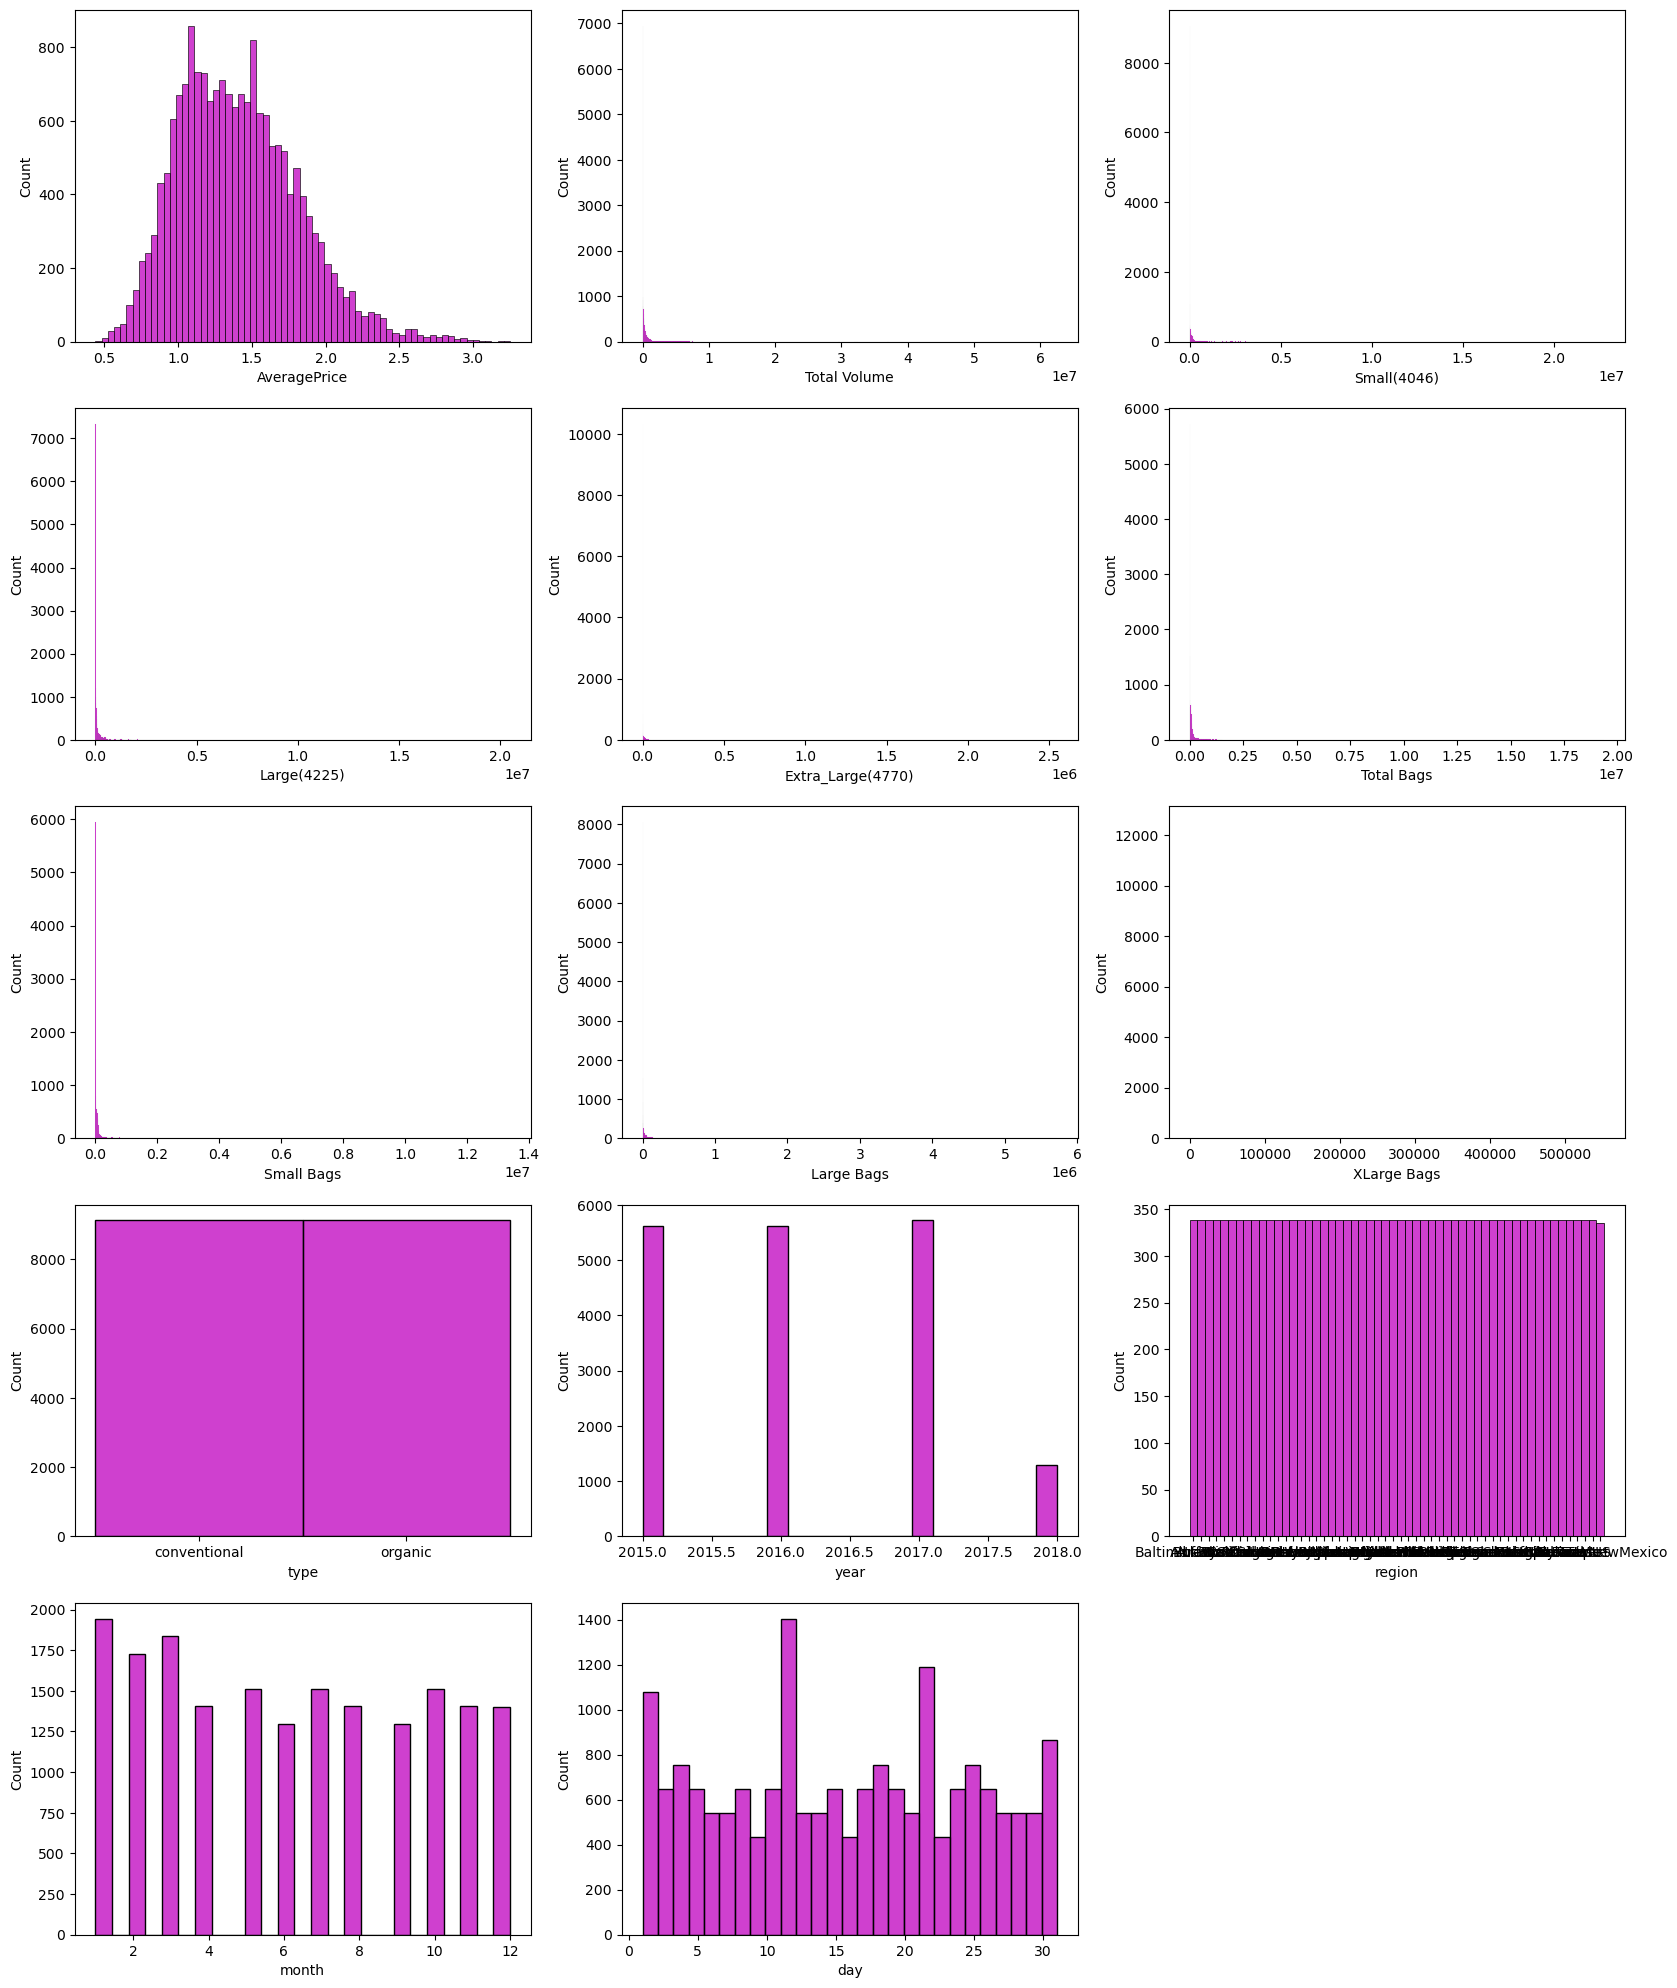

In [21]:
#Visualizing it
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [22]:
#Separating Categorical columns and Numerical columns

cat = ['type', 'year', 'region','month','day']
num = ['AveragePrice', 'Total Volume', 'Small(4046)','Large(4225)','Extra_Large(4770)','Total Bags','Small Bags','Large Bags','XLarge Bags' ]

b. Bivariate Analysis

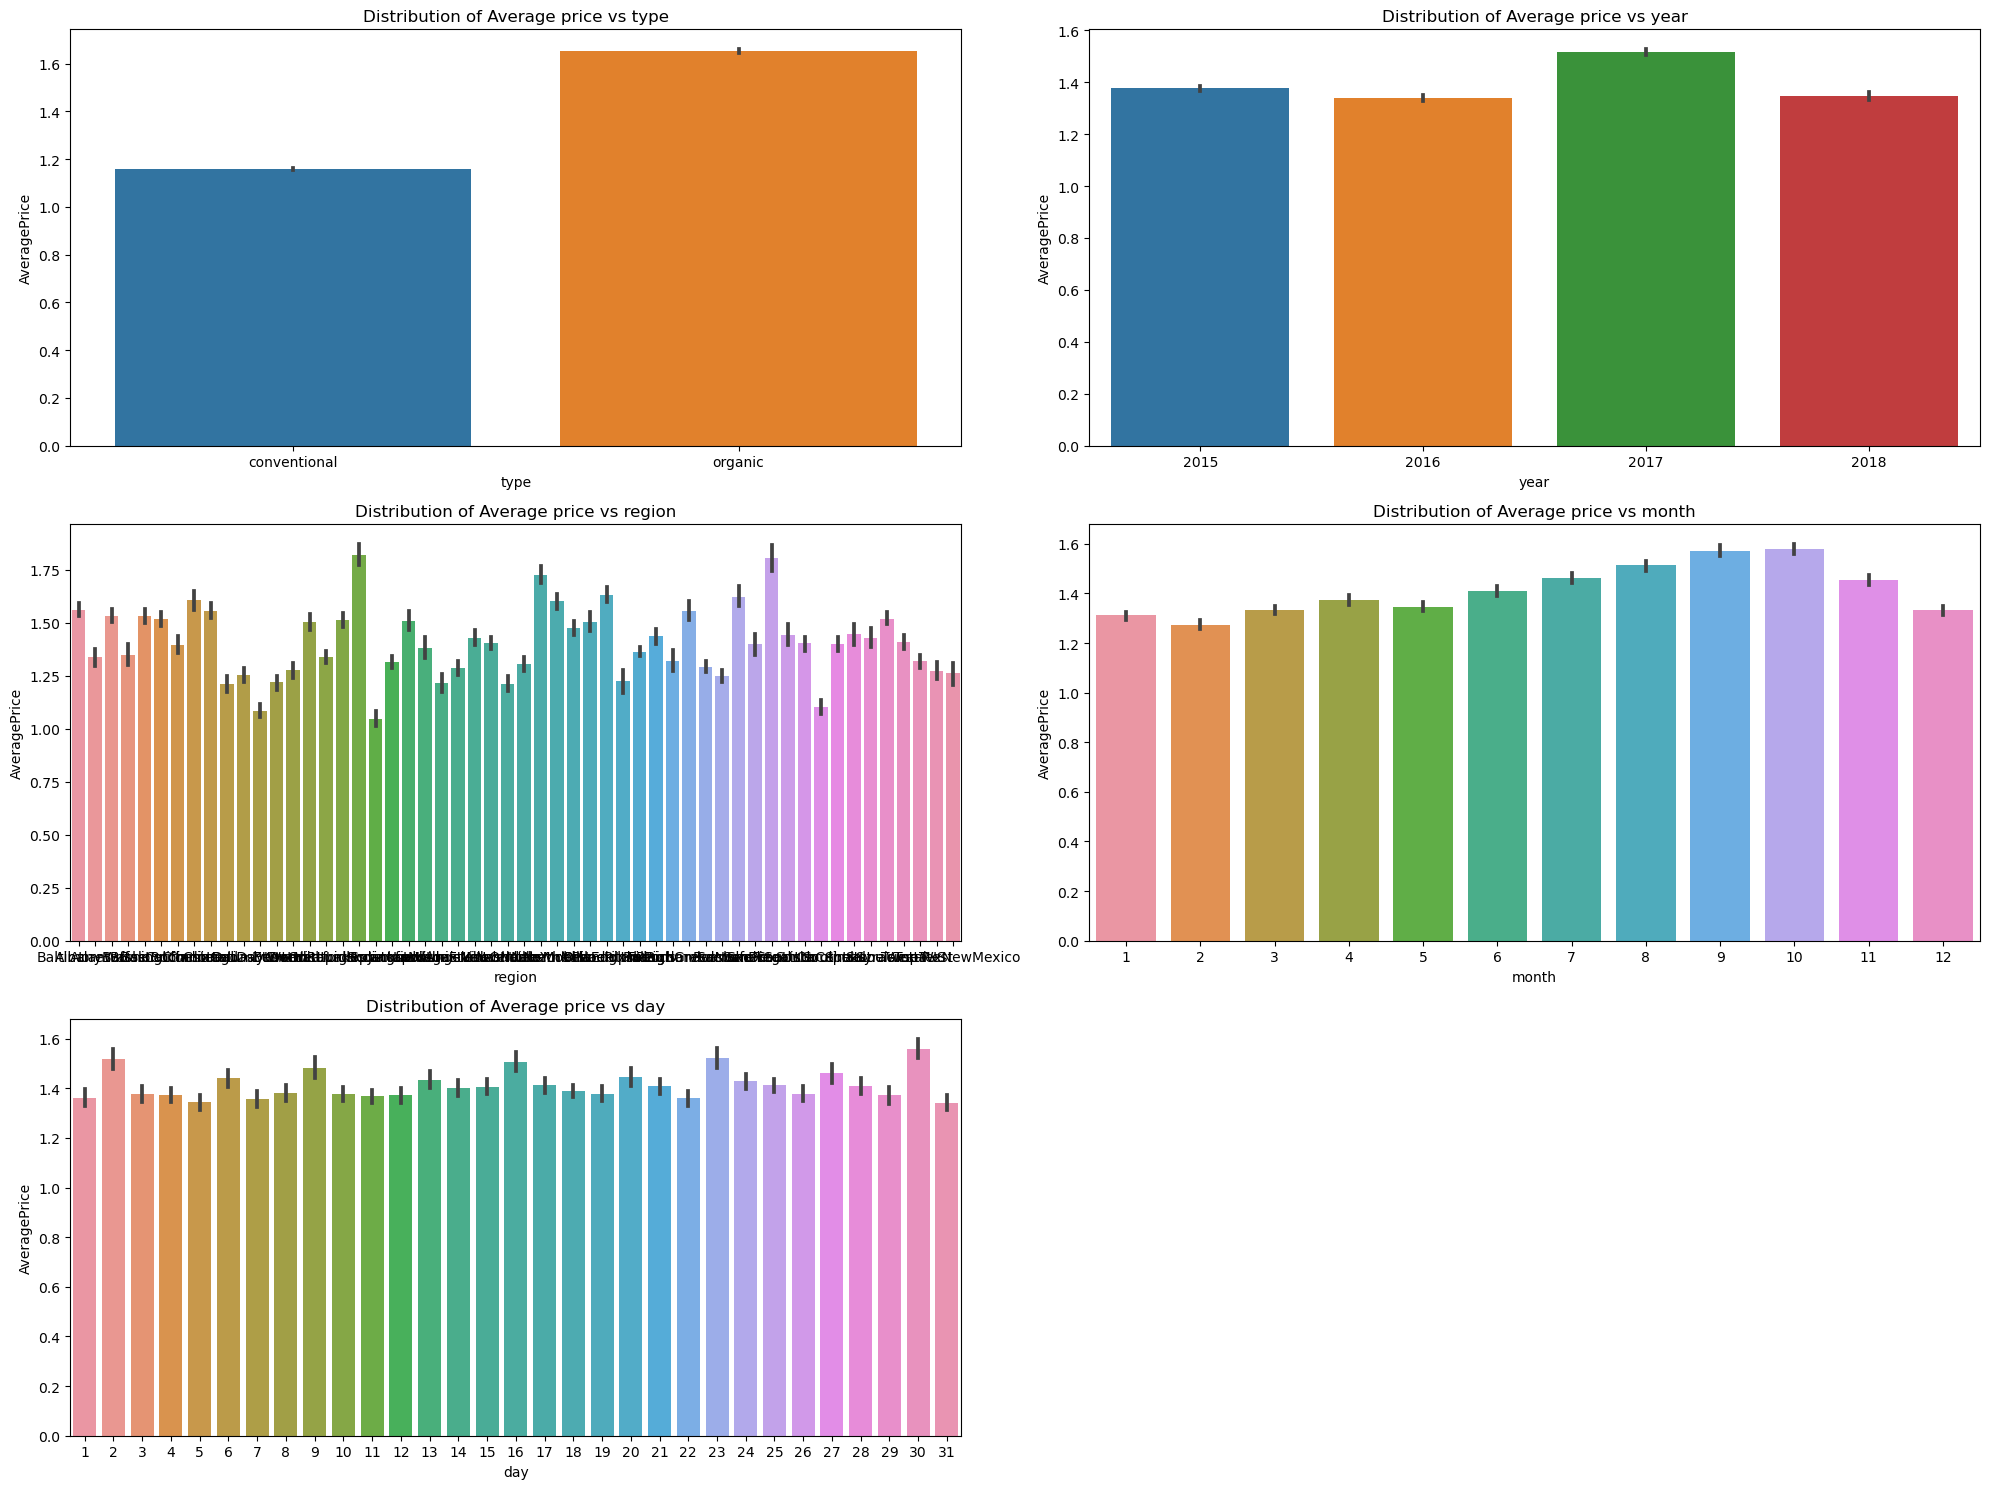

In [23]:
# Average price vs Categorical column
plt.figure(figsize=(20, 15))
plotnumber=1

for i in cat:
    if plotnumber <=6:
        ax = plt.subplot(3,2, plotnumber)
        sns.barplot(x=df[i], y='AveragePrice', data=df)
        plt.title(f'Distribution of Average price vs {i}')
    plotnumber += 1
        
plt.tight_layout()
plt.show()

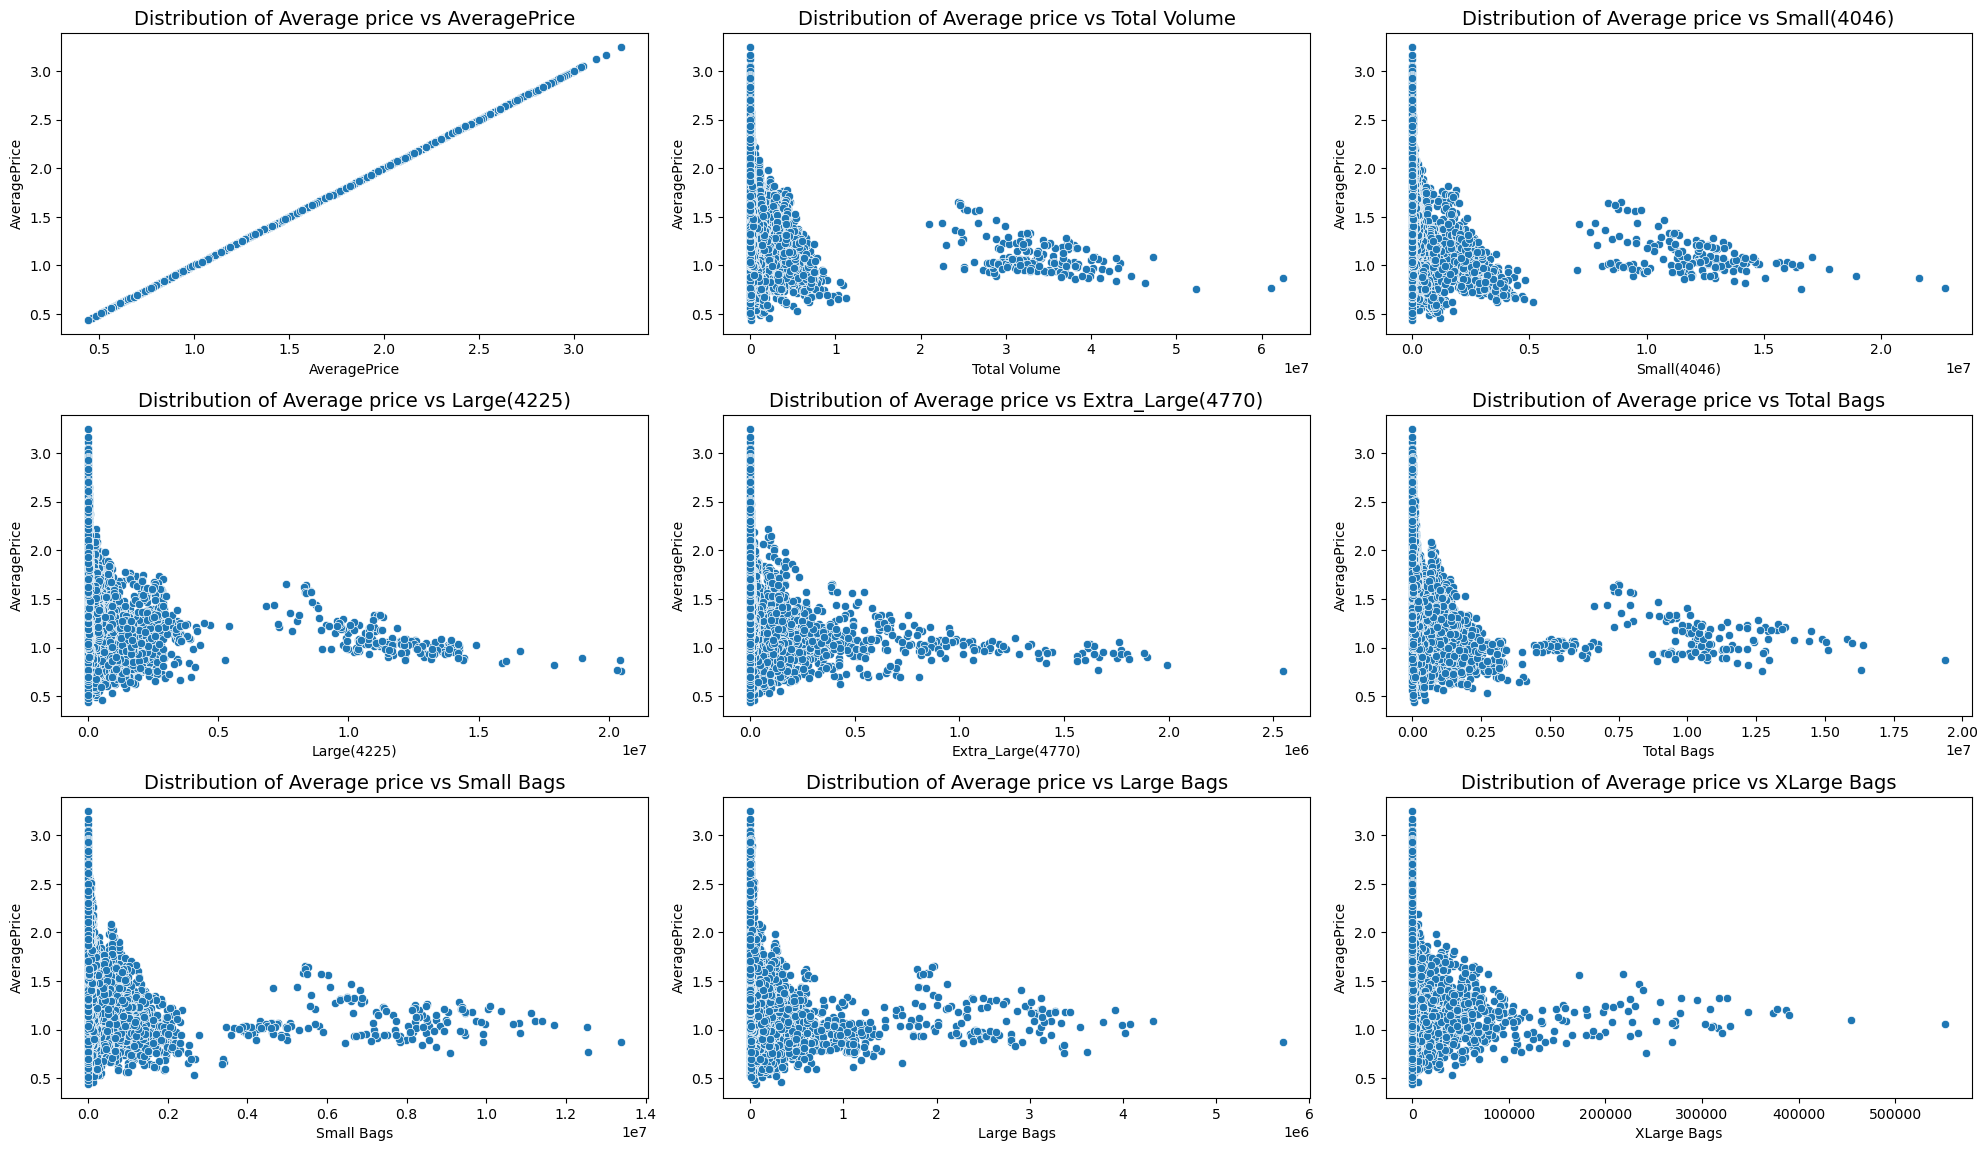

In [24]:
#Average price vs numeric col

plt.figure(figsize=(20, 15))
plotnumber=1

for i in num:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.scatterplot(x=df[i], y='AveragePrice', data=df)
        plt.title(f'Distribution of Average price vs {i}', fontsize=14)
    plotnumber += 1
        
plt.tight_layout()
plt.show()

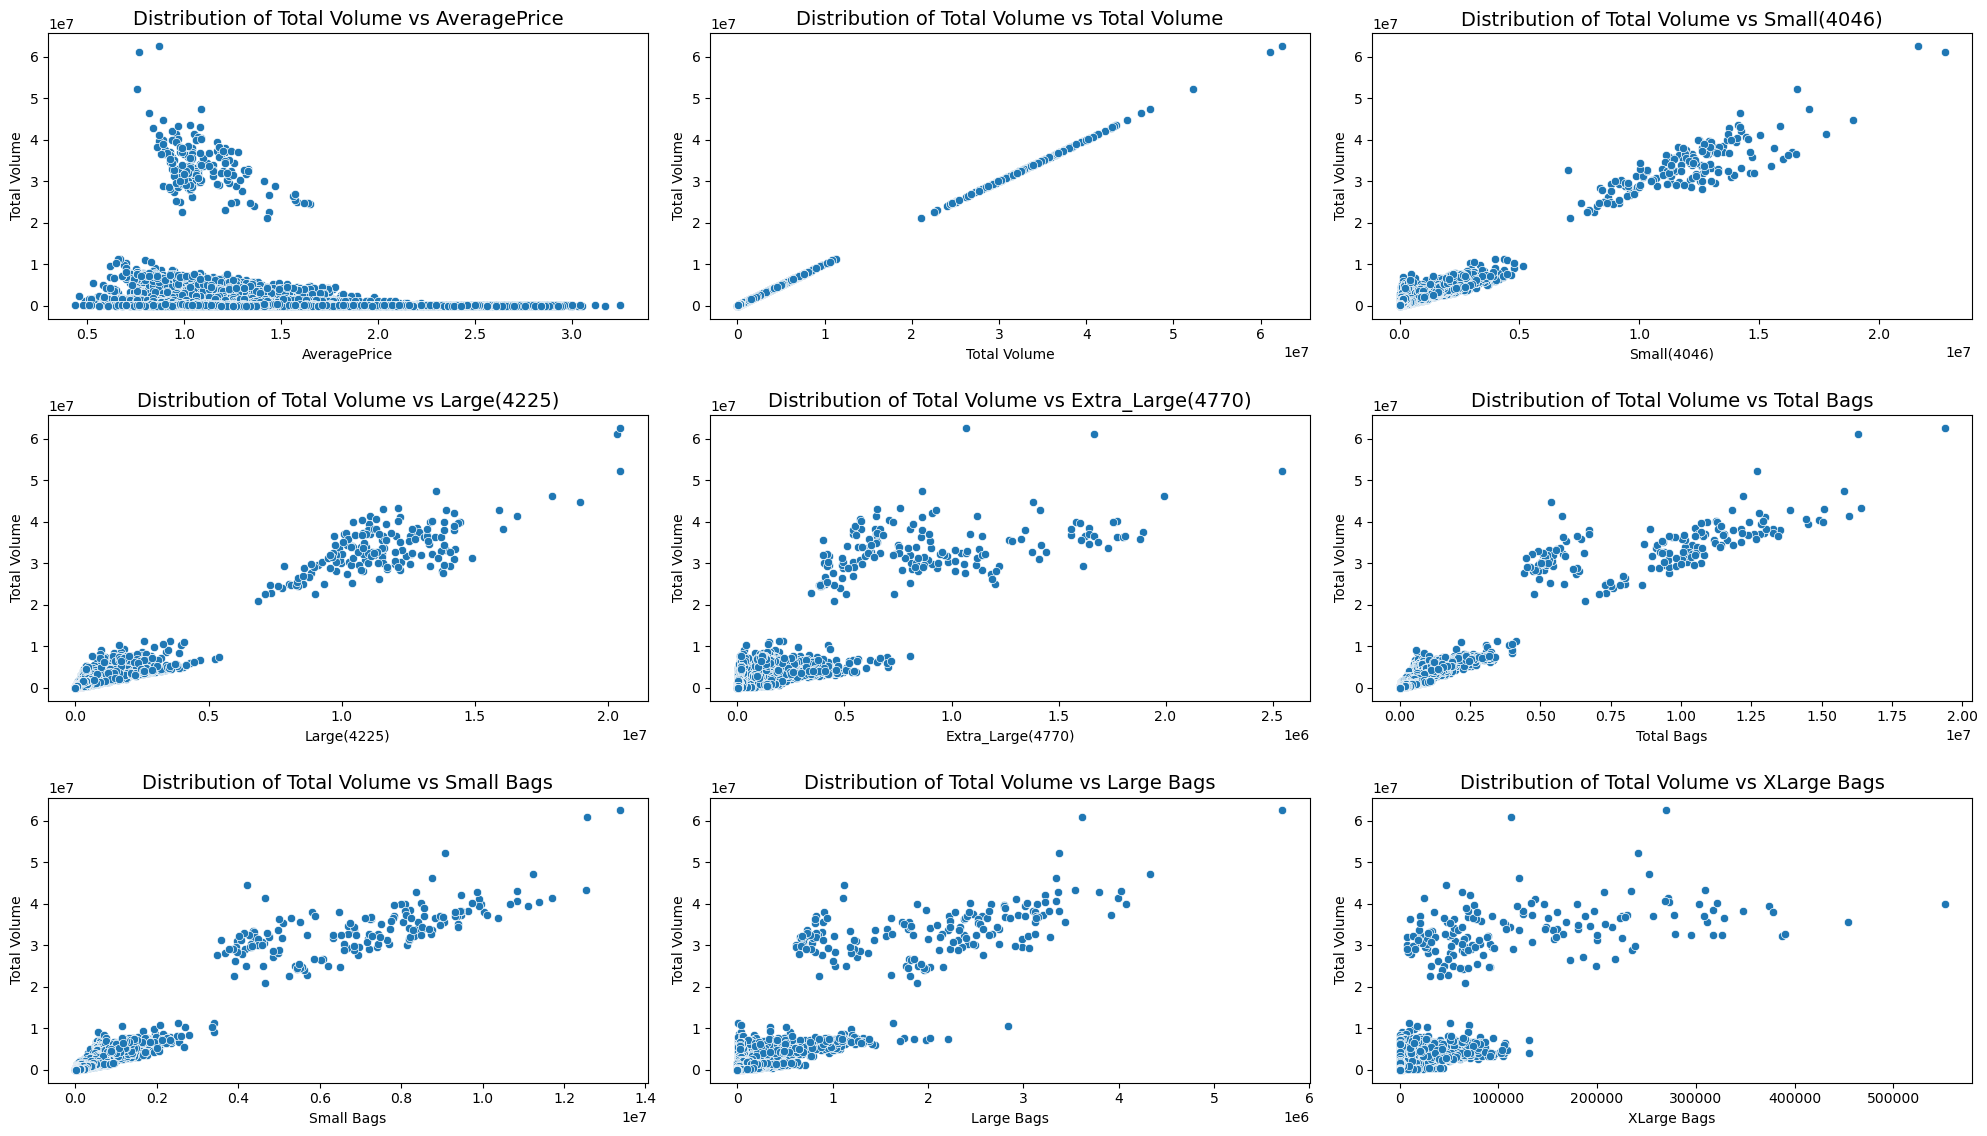

In [25]:
#Total Volume vs numeric col

plt.figure(figsize=(20, 15))
plotnumber=1

for i in num:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.scatterplot(x=df[i], y='Total Volume', data=df)
        plt.title(f'Distribution of Total Volume vs {i}',fontsize=14)
    plotnumber += 1
        
plt.tight_layout()
plt.show()

Total Volume of Avacados Vs Region

In [26]:
region_vol= df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
region_vol

region  Total Volume
0               TotalUS  5.864740e+09
1                  West  1.086779e+09
2            California  1.028982e+09
3          SouthCentral  1.011280e+09
4             Northeast  7.132809e+08
5             Southeast  6.152384e+08
6            GreatLakes  5.896425e+08
7              Midsouth  5.083494e+08
8            LosAngeles  5.078965e+08
9                Plains  3.111885e+08
10              NewYork  2.407341e+08
11        DallasFtWorth  2.084193e+08
12              Houston  2.031679e+08
13        PhoenixTucson  1.956433e+08
14     WestTexNewMexico  1.445218e+08
15               Denver  1.389025e+08
16         SanFrancisco  1.358302e+08
17  BaltimoreWashington  1.347139e+08
18              Chicago  1.337023e+08
19             Portland  1.105522e+08
20              Seattle  1.092142e+08
21    MiamiFtLauderdale  9.767322e+07
22               Boston  9.727398e+07
23             SanDiego  8.979192e+07
24              Atlanta  8.860512e+07
25           Sacramento  7.516375e+07
26         Philadelphia  7.183880e+07
27   NorthernNewEngland  7.153289e+07
28                Tampa  6.600454e+07
29              Detroit  6.342242e+07
30        SouthCarolina  6.075377e+07
31              Orlando  5.866070e+07
32             LasVegas  5.437691e+07
33  HartfordSpringfield  5.067054e+07
34    RaleighGreensboro  4.820273e+07
35     NewOrleansMobile  4.569514e+07
36     CincinnatiDayton  4.452201e+07
37      RichmondNorfolk  4.223085e+07
38   HarrisburgScranton  4.180886e+07
39            Nashville  3.561209e+07
40            Charlotte  3.555554e+07
41              StLouis  3.207283e+07
42         Indianapolis  3.026339e+07
43          GrandRapids  3.021174e+07
44             Columbus  2.999336e+07
45         Jacksonville  2.879000e+07
46              Roanoke  2.504201e+07
47     BuffaloRochester  2.296247e+07
48           Pittsburgh  1.880635e+07
49           Louisville  1.609700e+07
50               Albany  1.606780e+07
51              Spokane  1.556528e+07
52                Boise  1.441319e+07
53             Syracuse  1.094267e+07

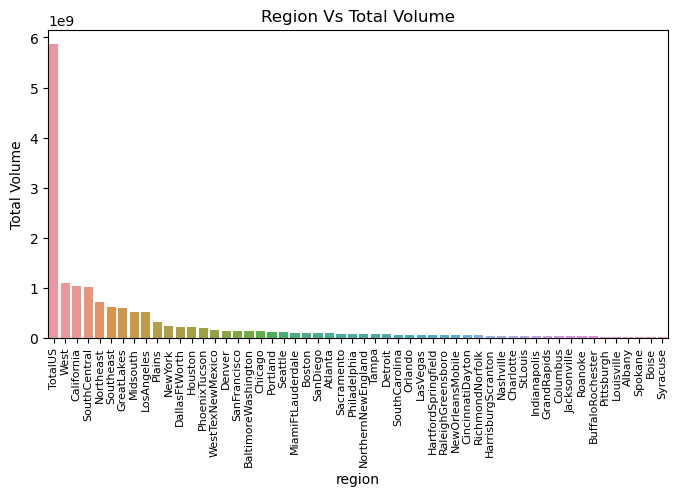

In [27]:
#Visualizing it
plt.figure(figsize=(8,4))
sns.barplot(y=region_vol["Total Volume"],x=region_vol['region'],data=df)
plt.xticks(rotation=90, fontsize=8)
plt.title('Region Vs Total Volume')
plt.show()

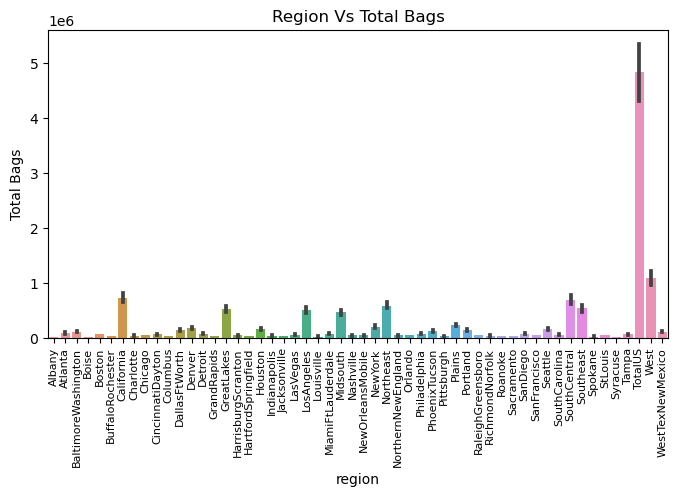

In [28]:
# Region vs Total Bags
plt.figure(figsize=(8,4))
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.title('Region Vs Total Bags')
plt.show()

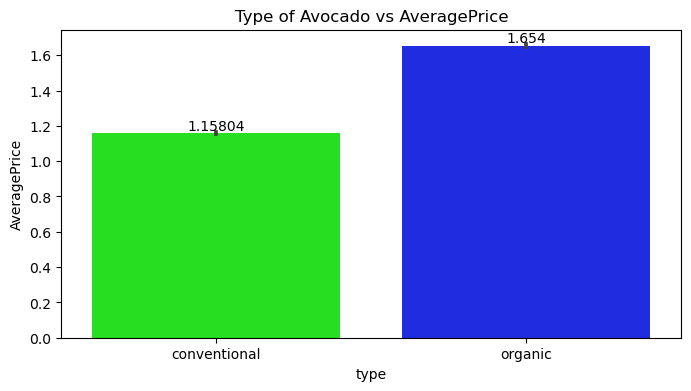

In [29]:
# Type of Avacodo Vs AveragePrice
plt.figure(figsize=(8,4))
ax=sns.barplot(y="AveragePrice", x="type", data=df, palette = 'hsv')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Type of Avocado vs AveragePrice')
plt.show()

c. Multivariate Analysis
Type of Avocado by Year & Total Volume

In [30]:
df.groupby(['year','type'])['Total Volume'].mean().reset_index()

year          type  Total Volume
0  2015  conventional  1.530128e+06
1  2015       organic  3.165993e+04
2  2016  conventional  1.670317e+06
3  2016       organic  4.652424e+04
4  2017  conventional  1.665327e+06
5  2017       organic  5.879018e+04
6  2018  conventional  2.058960e+06
7  2018       organic  7.489548e+04

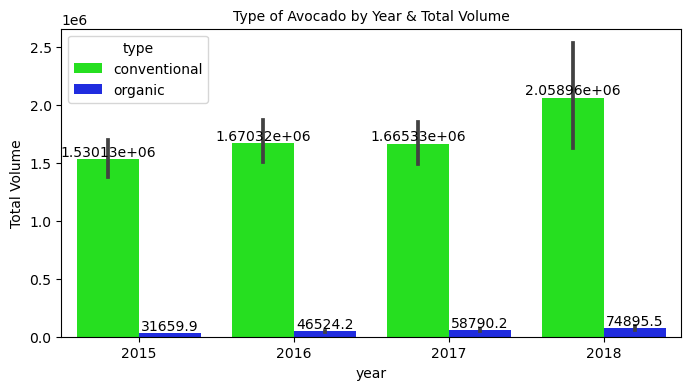

In [31]:
#Visualizing It
plt.figure(figsize=(8,4))
ax=sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='hsv')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Type of Avocado by Year & Total Volume', fontsize=10)
plt.show()

Average Price of Avacados by type & Year

In [32]:
pd.crosstab([df.type, df.year], df.AveragePrice, margins=True)

AveragePrice       0.44  0.46  0.48  0.49  0.51  0.52  0.53  0.54  0.55  0.56  \
type         year                                                               
conventional 2015     0     0     0     1     1     1     3     1     0     4   
             2016     0     0     0     0     1     0     0     3     2     4   
             2017     0     1     0     0     1     1     3     3     1     0   
             2018     0     0     0     0     0     0     0     0     0     2   
organic      2015     0     0     0     0     0     0     0     0     0     0   
             2016     0     0     0     0     0     0     0     0     0     0   
             2017     1     0     1     1     2     1     0     0     0     2   
             2018     0     0     0     0     0     0     0     0     0     0   
All                   1     1     1     2     5     3     6     7     3    12   

AveragePrice       ...  2.97  2.99  3.0  3.03  3.04  3.05  3.12  3.17  3.25  \
type         year  ...                                                        
conventional 2015  ...     0     0    0     0     0     0     0     0     0   
             2016  ...     0     0    0     0     0     0     0     0     0   
             2017  ...     0     0    0     0     0     0     0     0     0   
             2018  ...     0     0    0     0     0     0     0     0     0   
organic      2015  ...     0     0    0     0     0     0     0     0     0   
             2016  ...     0     1    0     1     0     0     1     0     1   
             2017  ...     1     1    2     0     1     1     0     1     0   
             2018  ...     0     0    0     0     0     0     0     0     0   
All                ...     1     2    2     1     1     1     1     1     1   

AveragePrice         All  
type         year         
conventional 2015   2808  
             2016   2808  
             2017   2862  
             2018    648  
organic      2015   2807  
             2016   2808  
             2017   2860  
             2018    648  
All                18249  

[9 rows x 260 columns]

In [33]:
type_averageprice = df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])
type_averageprice

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

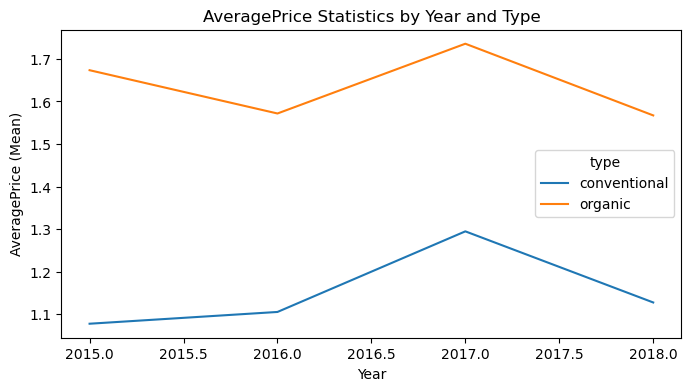

In [34]:
# Visualizing it
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='mean', hue='type', data=type_averageprice)
plt.title('AveragePrice Statistics by Year and Type')
plt.xlabel('Year')
plt.ylabel('AveragePrice (Mean)')
plt.show()

Month-Wise Variation in Average Price

In [35]:
df.groupby(['month','type'])['AveragePrice'].mean().reset_index()

month          type  AveragePrice
0       1  conventional      1.069095
1       1       organic      1.552942
2       2  conventional      1.017315
3       2       organic      1.531458
4       3  conventional      1.126209
5       3       organic      1.538301
6       4  conventional      1.142350
7       4       organic      1.606410
8       5  conventional      1.089577
9       5       organic      1.603624
10      6  conventional      1.149198
11      6       organic      1.669536
12      7  conventional      1.212487
13      7       organic      1.711667
14      8  conventional      1.235399
15      8       organic      1.789630
16      9  conventional      1.294738
17      9       organic      1.850571
18     10  conventional      1.349339
19     10       organic      1.810026
20     11  conventional      1.206054
21     11       organic      1.705071
22     12  conventional      1.077393
23     12       organic      1.585193

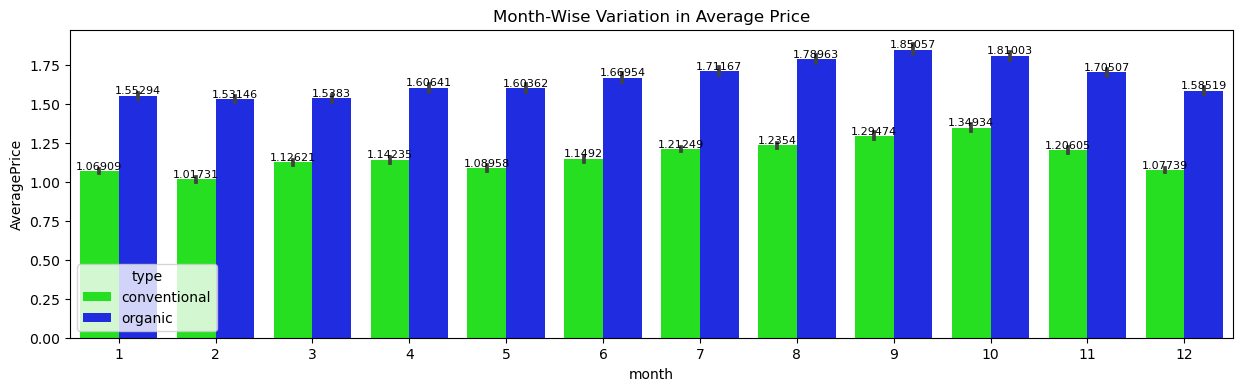

In [36]:
#Visualizing it
plt.figure(figsize=(15,4))
ax=sns.barplot(x="month", y="AveragePrice", hue='type', data=df, palette='hsv')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.title('Month-Wise Variation in Average Price')
plt.show()

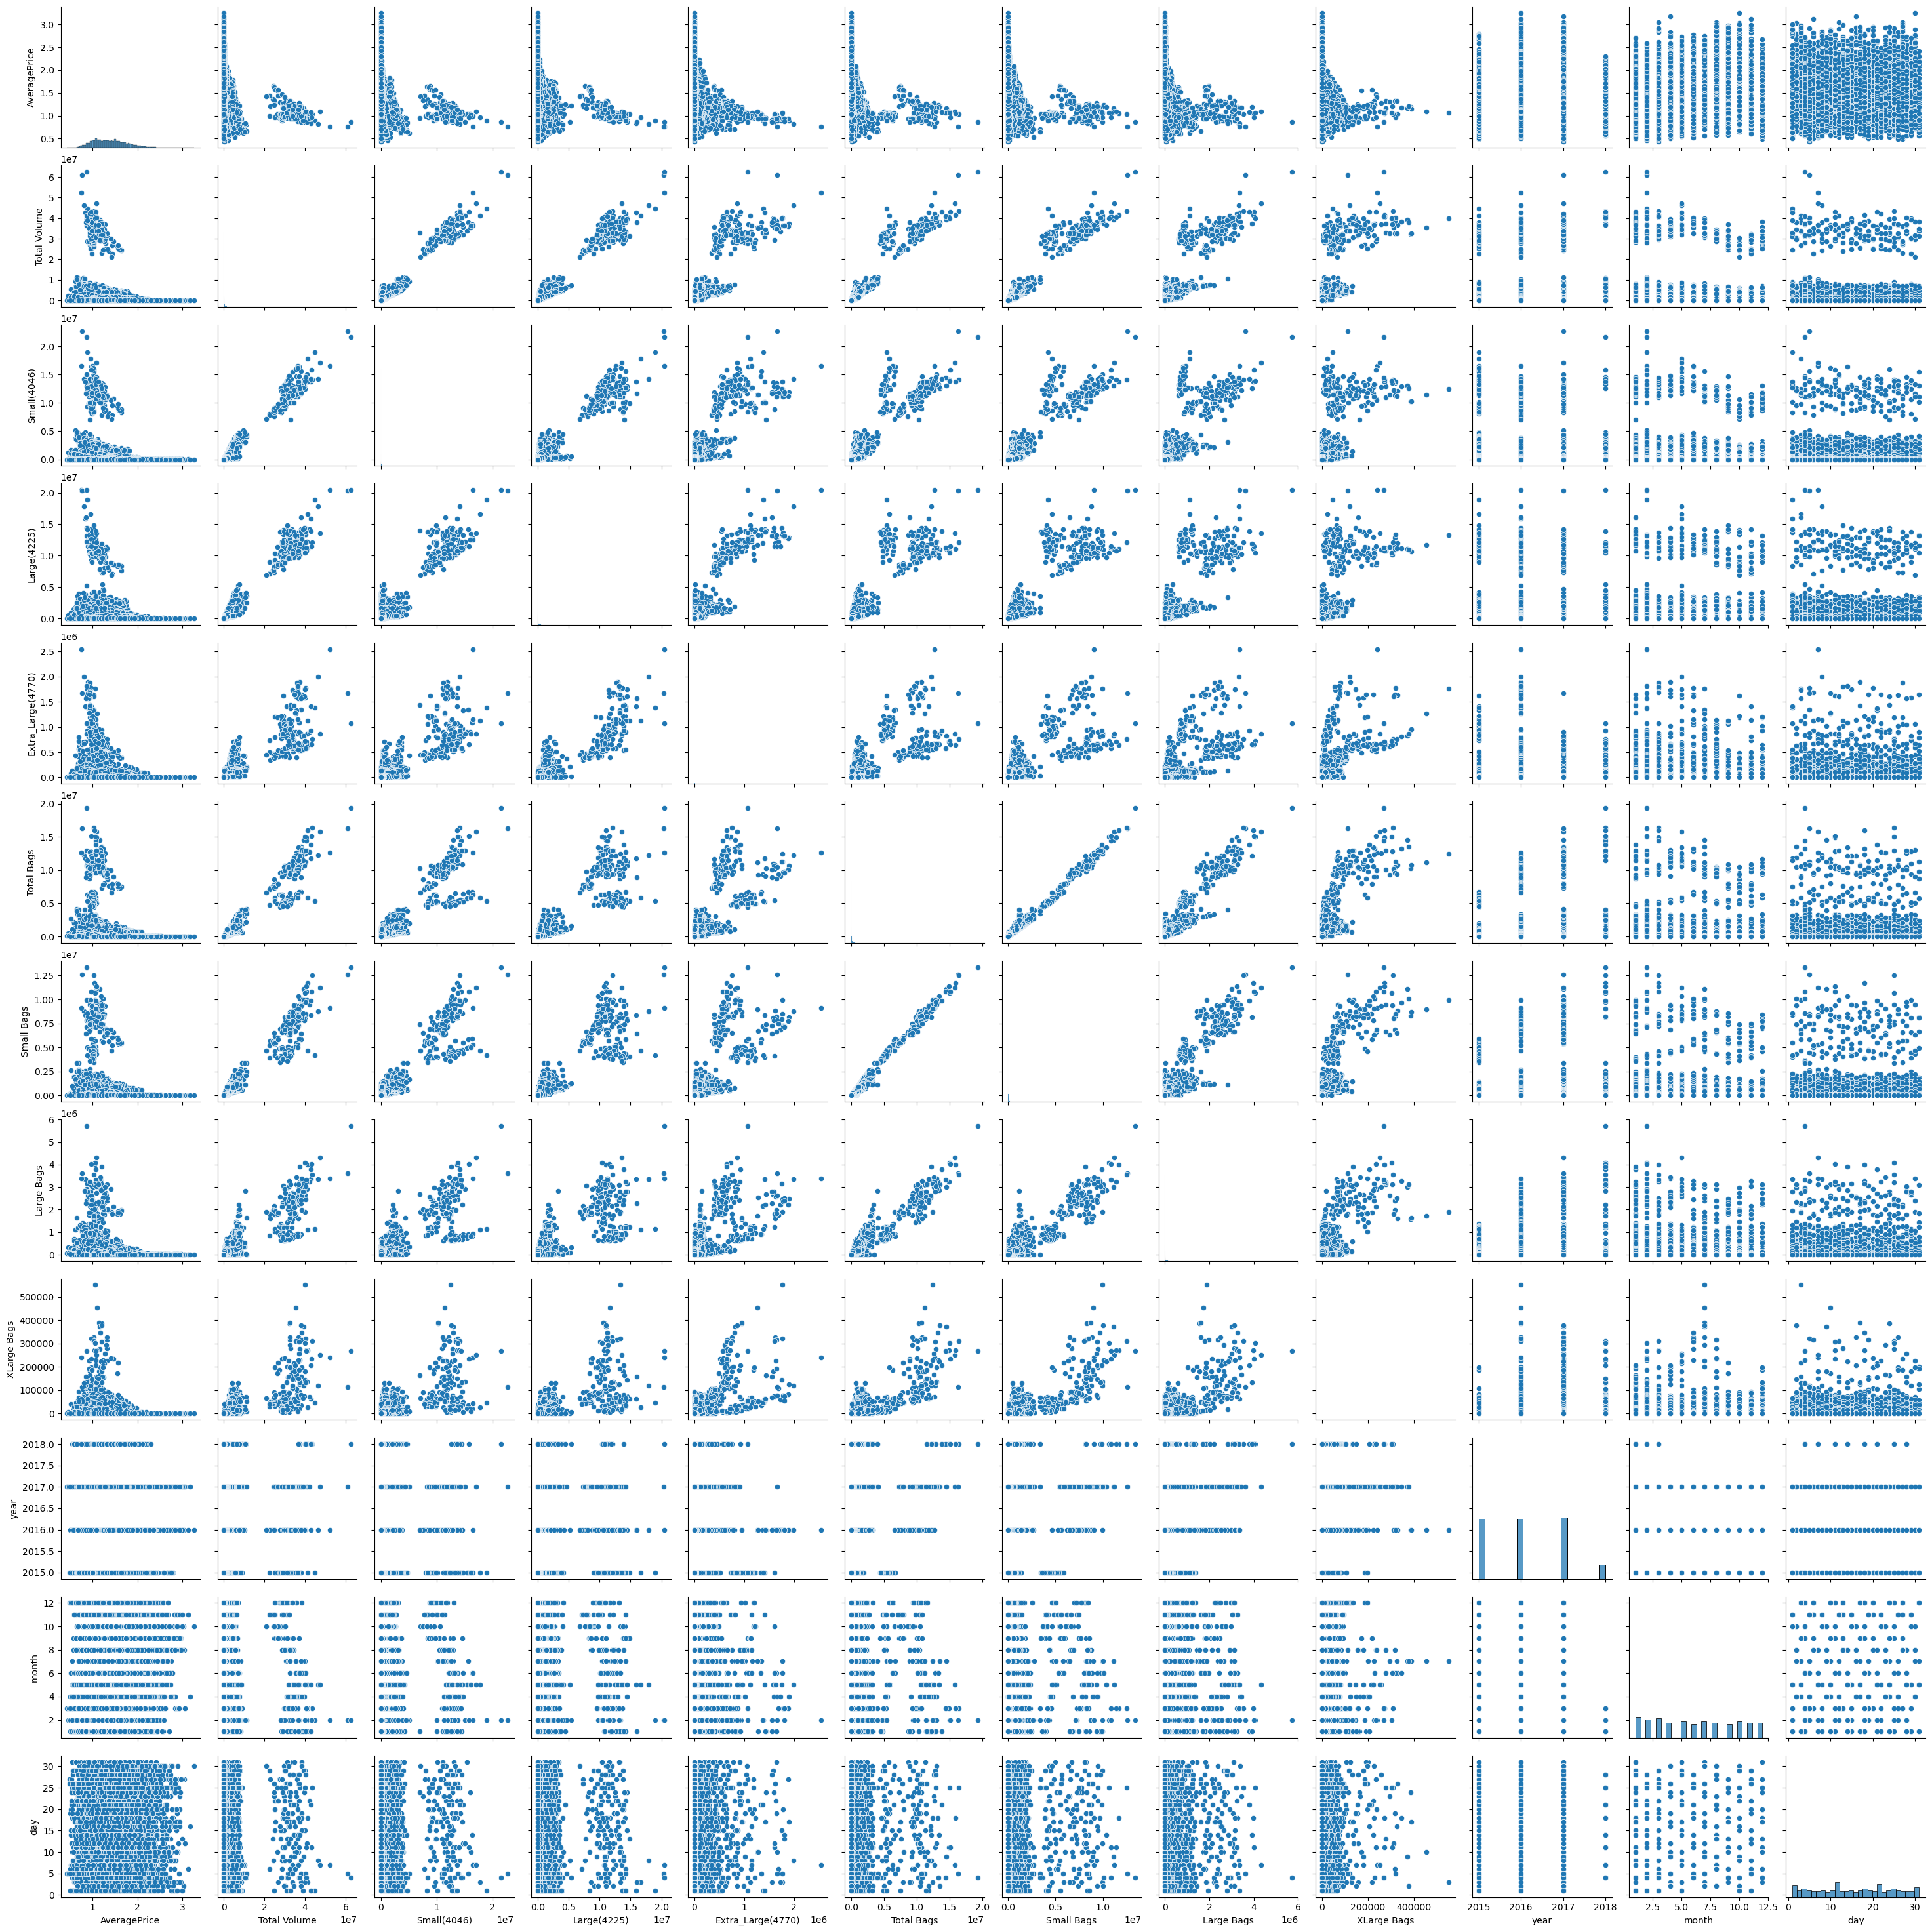

In [37]:
sns.pairplot(df)
plt.show()

In [ ]:
Encoding categorical Data

In [38]:
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

AveragePrice  Total Volume  Small(4046)  Large(4225)  Extra_Large(4770)  \
0          1.33      64236.62      1036.74     54454.85              48.16   
1          1.35      54876.98       674.28     44638.81              58.33   
2          0.93     118220.22       794.70    109149.67             130.50   
3          1.08      78992.15      1132.00     71976.41              72.58   
4          1.28      51039.60       941.48     43838.39              75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     0  2015       0     12   
1     9505.56     9408.07       97.49          0.0     0  2015       0     12   
2     8145.35     8042.21      103.14          0.0     0  2015       0     12   
3     5811.16     5677.40      133.76          0.0     0  2015       0     12   
4     6183.95     5986.26      197.69          0.0     0  2015       0     11   

   day  
0   27  
1   20  
2   13  
3    6  
4   29

Correlation Matrix

In [39]:
df_corr= df.corr()
df_corr

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
AveragePrice           1.000000     -0.192752    -0.208317    -0.172928   
Total Volume          -0.192752      1.000000     0.977863     0.974181   
Small(4046)           -0.208317      0.977863     1.000000     0.926110   
Large(4225)           -0.172928      0.974181     0.926110     1.000000   
Extra_Large(4770)     -0.179446      0.872202     0.833389     0.887855   
Total Bags            -0.177088      0.963047     0.920057     0.905787   
Small Bags            -0.174730      0.967238     0.925280     0.916031   
Large Bags            -0.172940      0.880640     0.838645     0.810015   
XLarge Bags           -0.117592      0.747157     0.699377     0.688809   
type                   0.615845     -0.232434    -0.225819    -0.232289   
year                   0.093197      0.017193     0.003353    -0.009559   
region                -0.011716      0.174176     0.192073     0.145726   
month                  0.162409     -0.024689    -0.025803    -0.022108   
day                    0.027386     -0.009747    -0.010159    -0.012393   

                   Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
AveragePrice               -0.179446   -0.177088   -0.174730   -0.172940   
Total Volume                0.872202    0.963047    0.967238    0.880640   
Small(4046)                 0.833389    0.920057    0.925280    0.838645   
Large(4225)                 0.887855    0.905787    0.916031    0.810015   
Extra_Large(4770)           1.000000    0.792314    0.802733    0.698471   
Total Bags                  0.792314    1.000000    0.994335    0.943009   
Small Bags                  0.802733    0.994335    1.000000    0.902589   
Large Bags                  0.698471    0.943009    0.902589    1.000000   
XLarge Bags                 0.679861    0.804233    0.806845    0.710858   
type                       -0.210027   -0.217788   -0.220535   -0.193177   
year                       -0.036531    0.071552    0.063915    0.087891   
region                      0.095252    0.175256    0.164702    0.198768   
month                      -0.033424   -0.022724   -0.023126   -0.020187   
day                        -0.009009   -0.004988   -0.003870   -0.008352   

                   XLarge Bags      type      year    region     month  \
AveragePrice         -0.117592  0.615845  0.093197 -0.011716  0.162409   
Total Volume          0.747157 -0.232434  0.017193  0.174176 -0.024689   
Small(4046)           0.699377 -0.225819  0.003353  0.192073 -0.025803   
Large(4225)           0.688809 -0.232289 -0.009559  0.145726 -0.022108   
Extra_Large(4770)     0.679861 -0.210027 -0.036531  0.095252 -0.033424   
Total Bags            0.804233 -0.217788  0.071552  0.175256 -0.022724   
Small Bags            0.806845 -0.220535  0.063915  0.164702 -0.023126   
Large Bags            0.710858 -0.193177  0.087891  0.198768 -0.020187   
XLarge Bags           1.000000 -0.175483  0.081033  0.082281 -0.012969   
type                 -0.175483  1.000000 -0.000032 -0.000280 -0.000085   
year                  0.081033 -0.000032  1.000000 -0.000055 -0.177050   
region                0.082281 -0.000280 -0.000055  1.000000 -0.000144   
month                -0.012969 -0.000085 -0.177050 -0.000144  1.000000   
day                   0.000319 -0.000013  0.004475 -0.000021  0.010621   

                        day  
AveragePrice       0.027386  
Total Volume      -0.009747  
Small(4046)       -0.010159  
Large(4225)       -0.012393  
Extra_Large(4770) -0.009009  
Total Bags        -0.004988  
Small Bags        -0.003870  
Large Bags        -0.008352  
XLarge Bags        0.000319  
type              -0.000013  
year               0.004475  
region            -0.000021  
month              0.010621  
day                1.000000

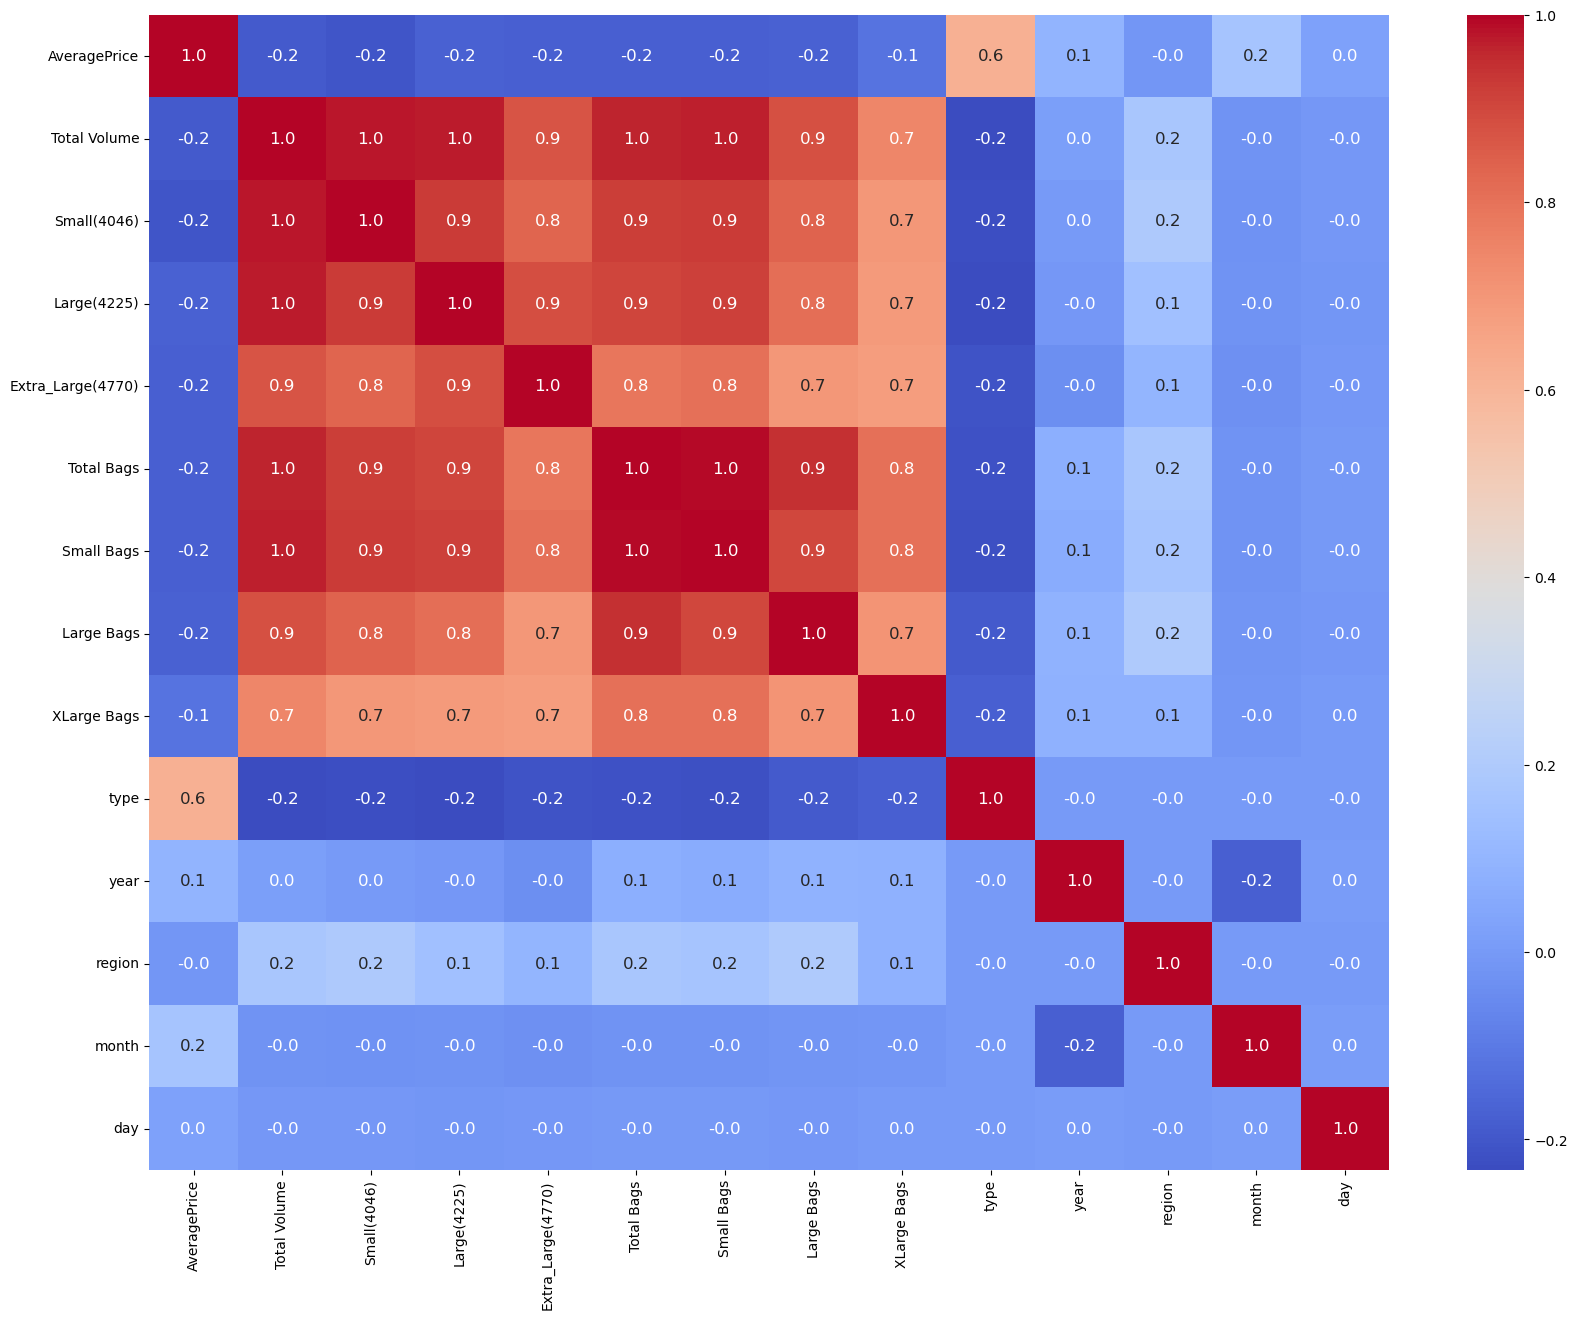

In [40]:
#visulaizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

Outlier Detection & Treatment

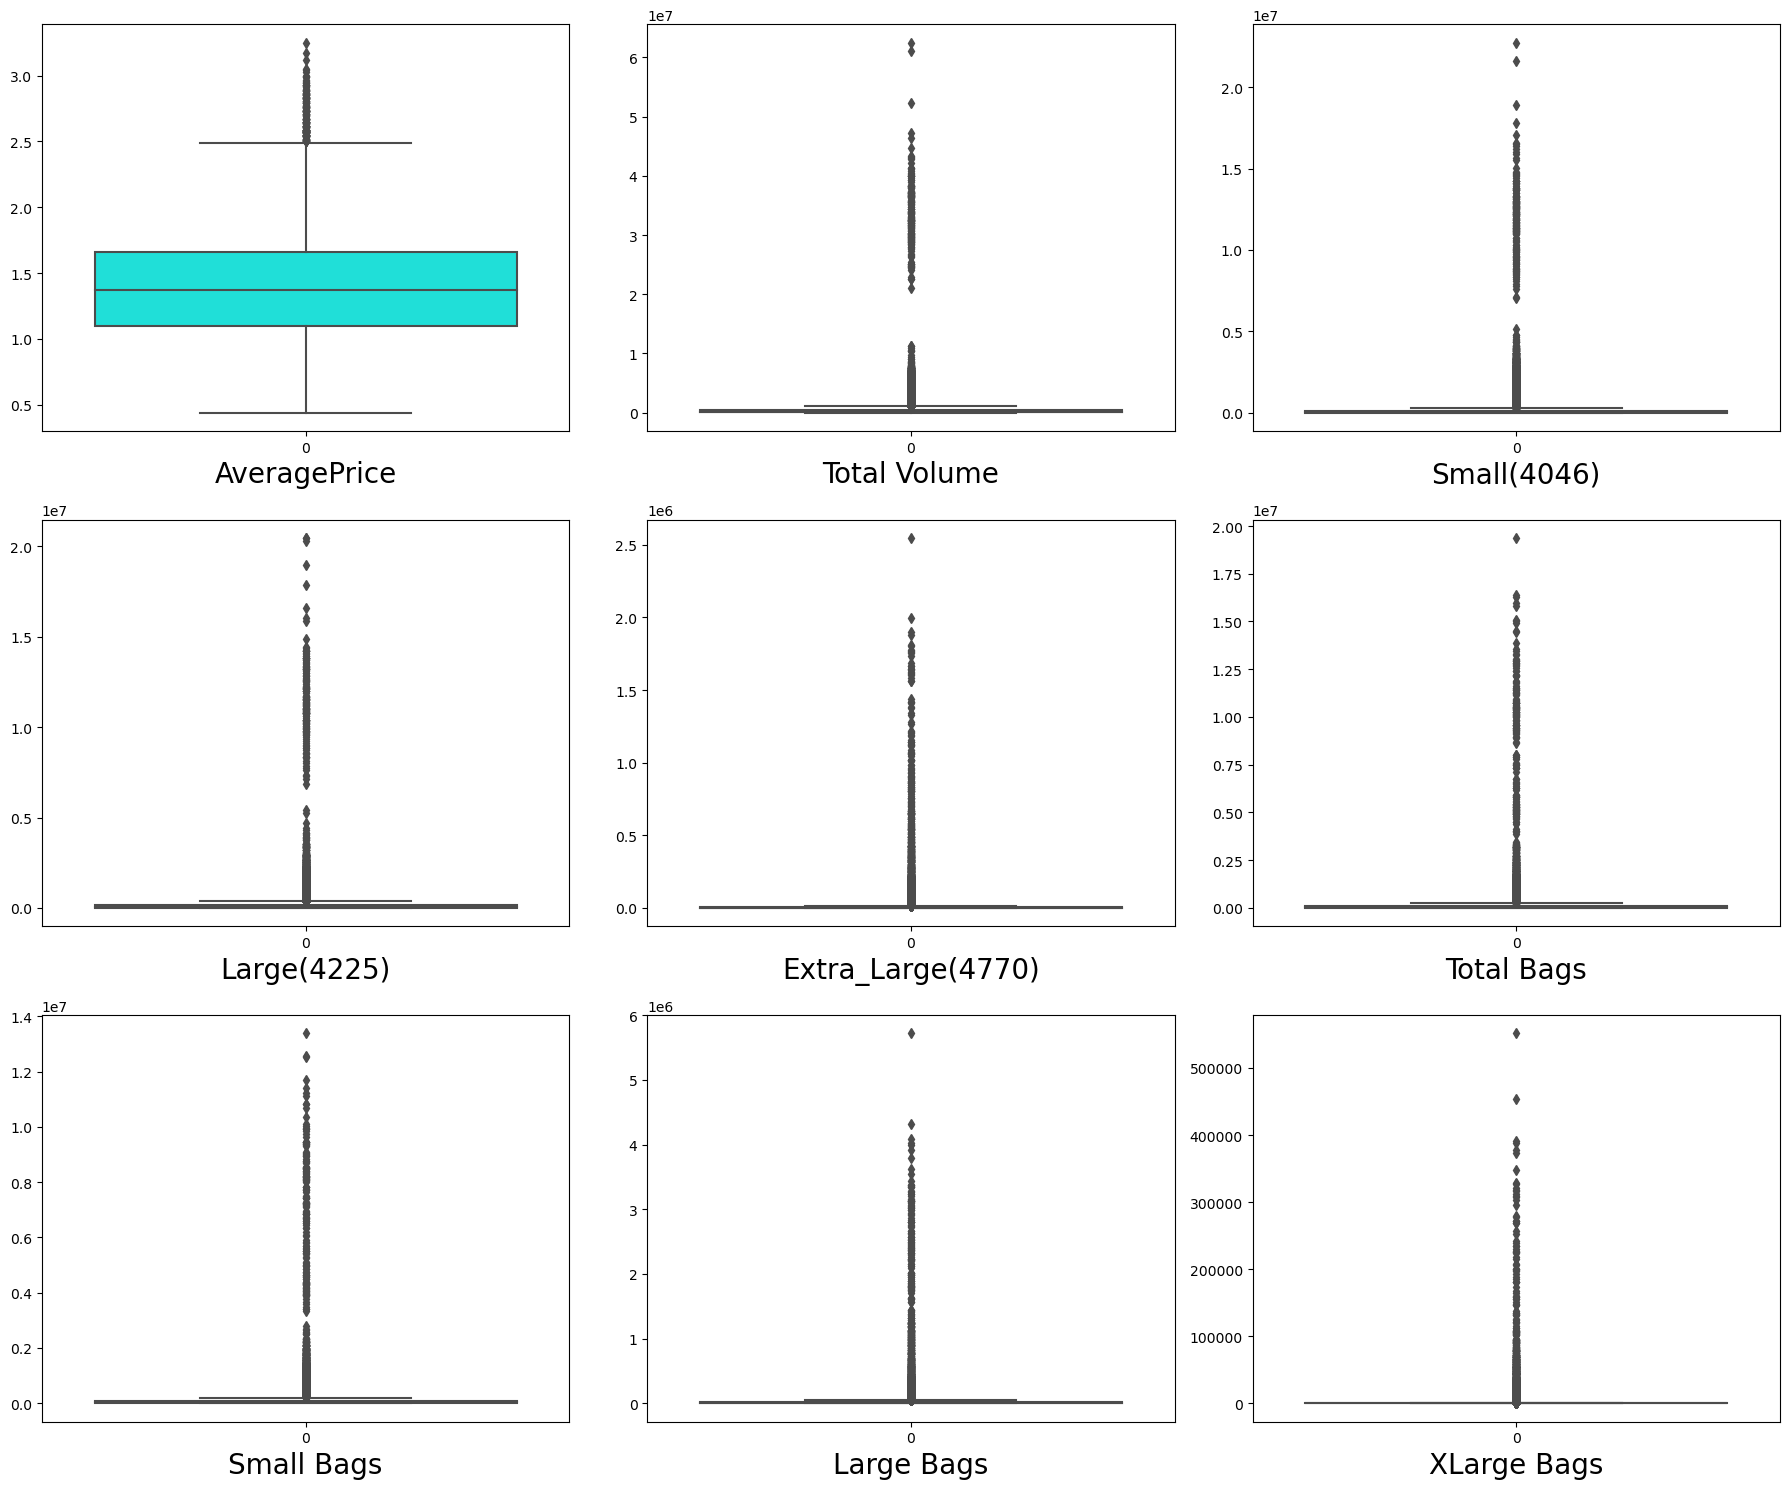

In [41]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in num:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Treatment

In [42]:
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]
df.shape

(17651, 14)

In [43]:
#Calculating Data Loss

initial_rows = 18249
rows_after_outlier_removal = 17651

loss_percentage = ((initial_rows - rows_after_outlier_removal) / initial_rows) * 100

print(f"Loss Percentage: {loss_percentage:.2f}%")

Loss Percentage: 3.28%


In [44]:
# Here i am copying DataFrame because in this project I have to predict Two Things AveragePrice and Region .
df1 =df.copy()

Data Cleaning:
According to our first job i.e to predict Average price

In [45]:
#correlation with target column
correlation_with_price = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_price)

AveragePrice         1.000000
type                 0.613150
Small(4046)          0.333577
Total Volume         0.332056
Total Bags           0.297323
Small Bags           0.275771
Large Bags           0.270915
Large(4225)          0.243988
Extra_Large(4770)    0.243465
XLarge Bags          0.152669
month                0.149502
year                 0.091704
day                  0.026819
region               0.003242
Name: AveragePrice, dtype: float64


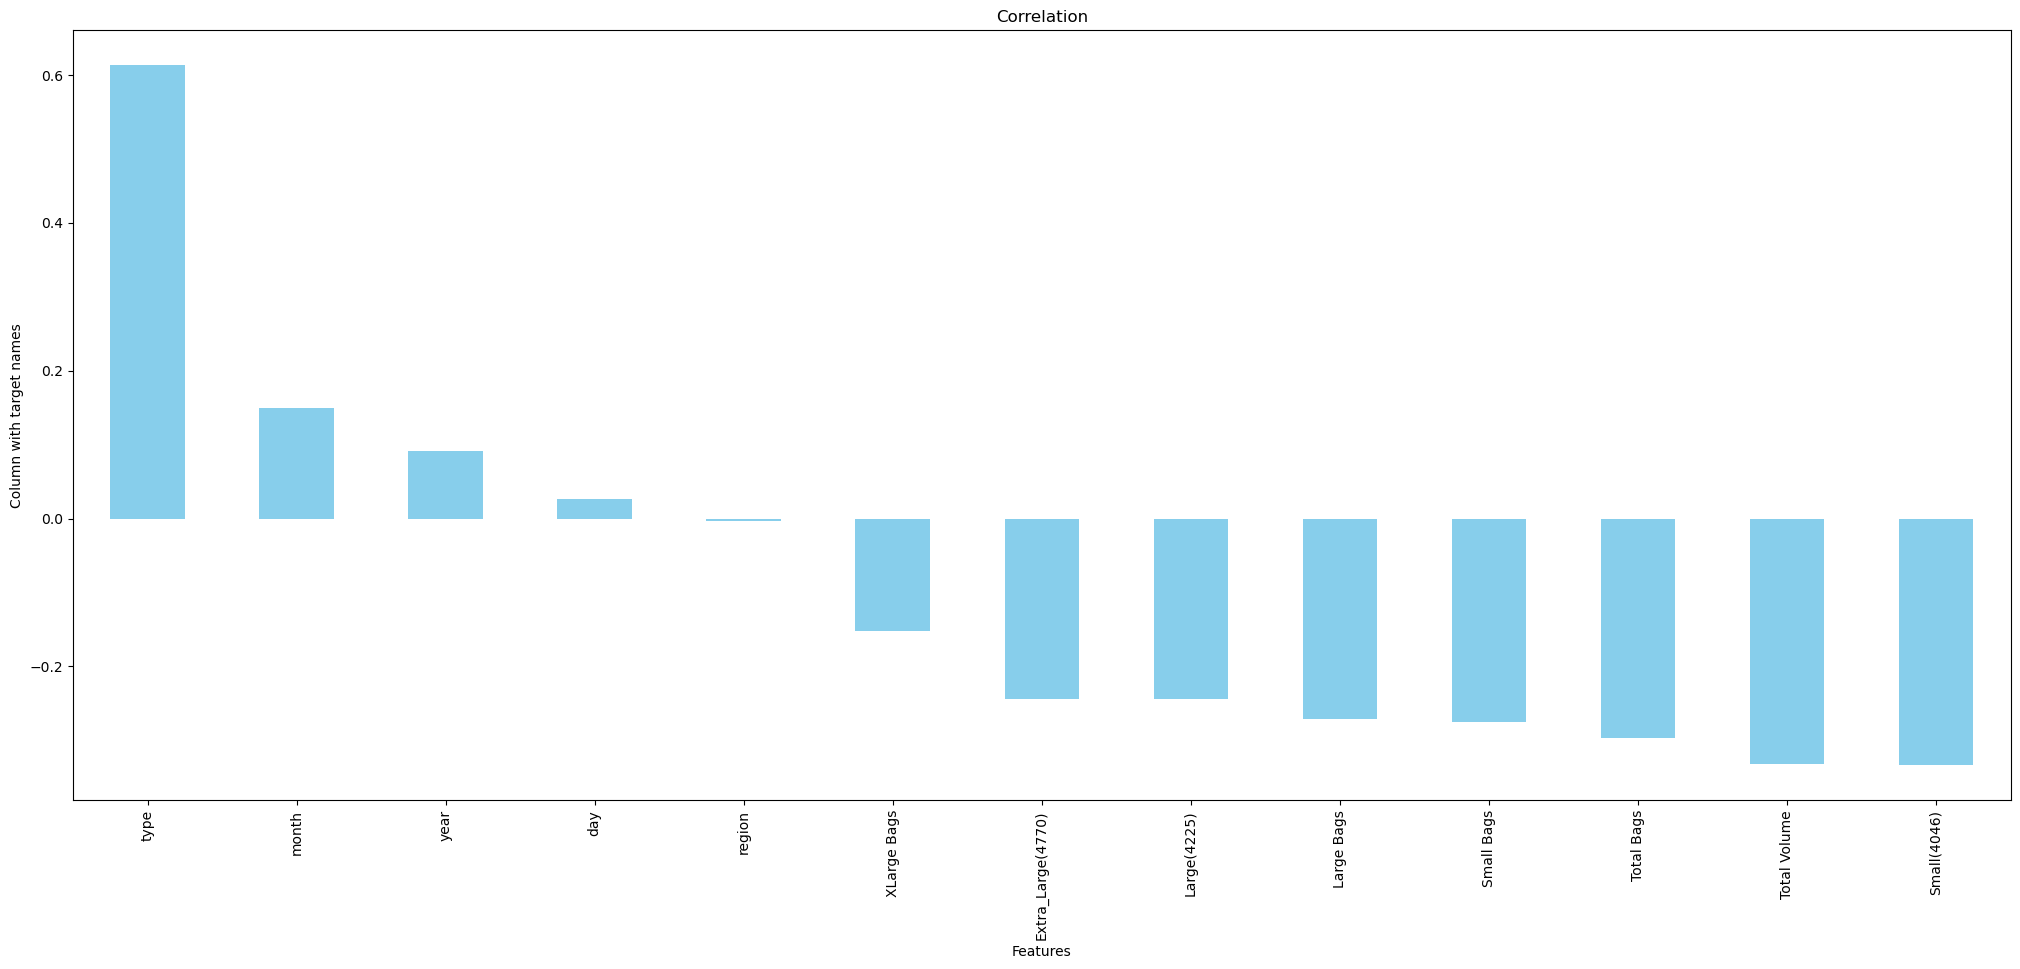

In [46]:
# Visualizing it
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [47]:
# Dropping the column
df.drop(columns=['region','day',],axis=1, inplace=True)

Checking Correlation of All the Column

In [48]:
df_corr = df.corr()
df_corr

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
AveragePrice           1.000000     -0.332056    -0.333577    -0.243988   
Total Volume          -0.332056      1.000000     0.876307     0.871592   
Small(4046)           -0.333577      0.876307     1.000000     0.565118   
Large(4225)           -0.243988      0.871592     0.565118     1.000000   
Extra_Large(4770)     -0.243465      0.647518     0.492127     0.620221   
Total Bags            -0.297323      0.912184     0.727981     0.757786   
Small Bags            -0.275771      0.905648     0.706800     0.778761   
Large Bags            -0.270915      0.640642     0.561060     0.451711   
XLarge Bags           -0.152669      0.513741     0.415432     0.392030   
type                   0.613150     -0.415476    -0.341376    -0.383138   
year                   0.091704     -0.004866    -0.034636    -0.040234   
month                  0.149502     -0.018645    -0.015797    -0.019844   

                   Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
AveragePrice               -0.243465   -0.297323   -0.275771   -0.270915   
Total Volume                0.647518    0.912184    0.905648    0.640642   
Small(4046)                 0.492127    0.727981    0.706800    0.561060   
Large(4225)                 0.620221    0.757786    0.778761    0.451711   
Extra_Large(4770)           1.000000    0.557980    0.571512    0.323747   
Total Bags                  0.557980    1.000000    0.978213    0.746946   
Small Bags                  0.571512    0.978213    1.000000    0.593155   
Large Bags                  0.323747    0.746946    0.593155    1.000000   
XLarge Bags                 0.495976    0.581690    0.597700    0.296864   
type                       -0.321809   -0.378205   -0.367593   -0.286813   
year                       -0.082054    0.103442    0.086639    0.119543   
month                      -0.027245   -0.010916   -0.013018   -0.001457   

                   XLarge Bags      type      year     month  
AveragePrice         -0.152669  0.613150  0.091704  0.149502  
Total Volume          0.513741 -0.415476 -0.004866 -0.018645  
Small(4046)           0.415432 -0.341376 -0.034636 -0.015797  
Large(4225)           0.392030 -0.383138 -0.040234 -0.019844  
Extra_Large(4770)     0.495976 -0.321809 -0.082054 -0.027245  
Total Bags            0.581690 -0.378205  0.103442 -0.010916  
Small Bags            0.597700 -0.367593  0.086639 -0.013018  
Large Bags            0.296864 -0.286813  0.119543 -0.001457  
XLarge Bags           1.000000 -0.263734  0.108209  0.002843  
type                 -0.263734  1.000000  0.003867 -0.009499  
year                  0.108209  0.003867  1.000000 -0.175287  
month                 0.002843 -0.009499 -0.175287  1.000000

In [49]:
# writing function for finding those columns who are highly correlated with each other

correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)
features_to_drop

{'Large(4225)', 'Small Bags', 'Small(4046)', 'Total Bags'}

In [50]:
#Dropping Highly correlated column
df.drop(columns=['Large(4225)','Small Bags','Small Bags','Total Bags'],axis=1, inplace=True)

Checking for Multicollinearity (VIF)

In [52]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF           Features
0  24.922920       AveragePrice
1   8.971638       Total Volume
2   5.195070        Small(4046)
3   2.170020  Extra_Large(4770)
4   2.011977         Large Bags
5   1.558412        XLarge Bags
6   3.698636               type
7  20.087284               year
8   4.217280              month

In [53]:
# Dropping Year Column
df.drop(columns=['year'],axis=1, inplace=True)

Skewness Detection & Teatment

In [54]:
df.skew()

AveragePrice         0.377432
Total Volume         3.767138
Small(4046)          4.909848
Extra_Large(4770)    5.117170
Large Bags           5.053434
XLarge Bags          6.135607
type                -0.037741
month                0.107408
dtype: float64

In [55]:
# Treating Skewed data using log transformatin
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

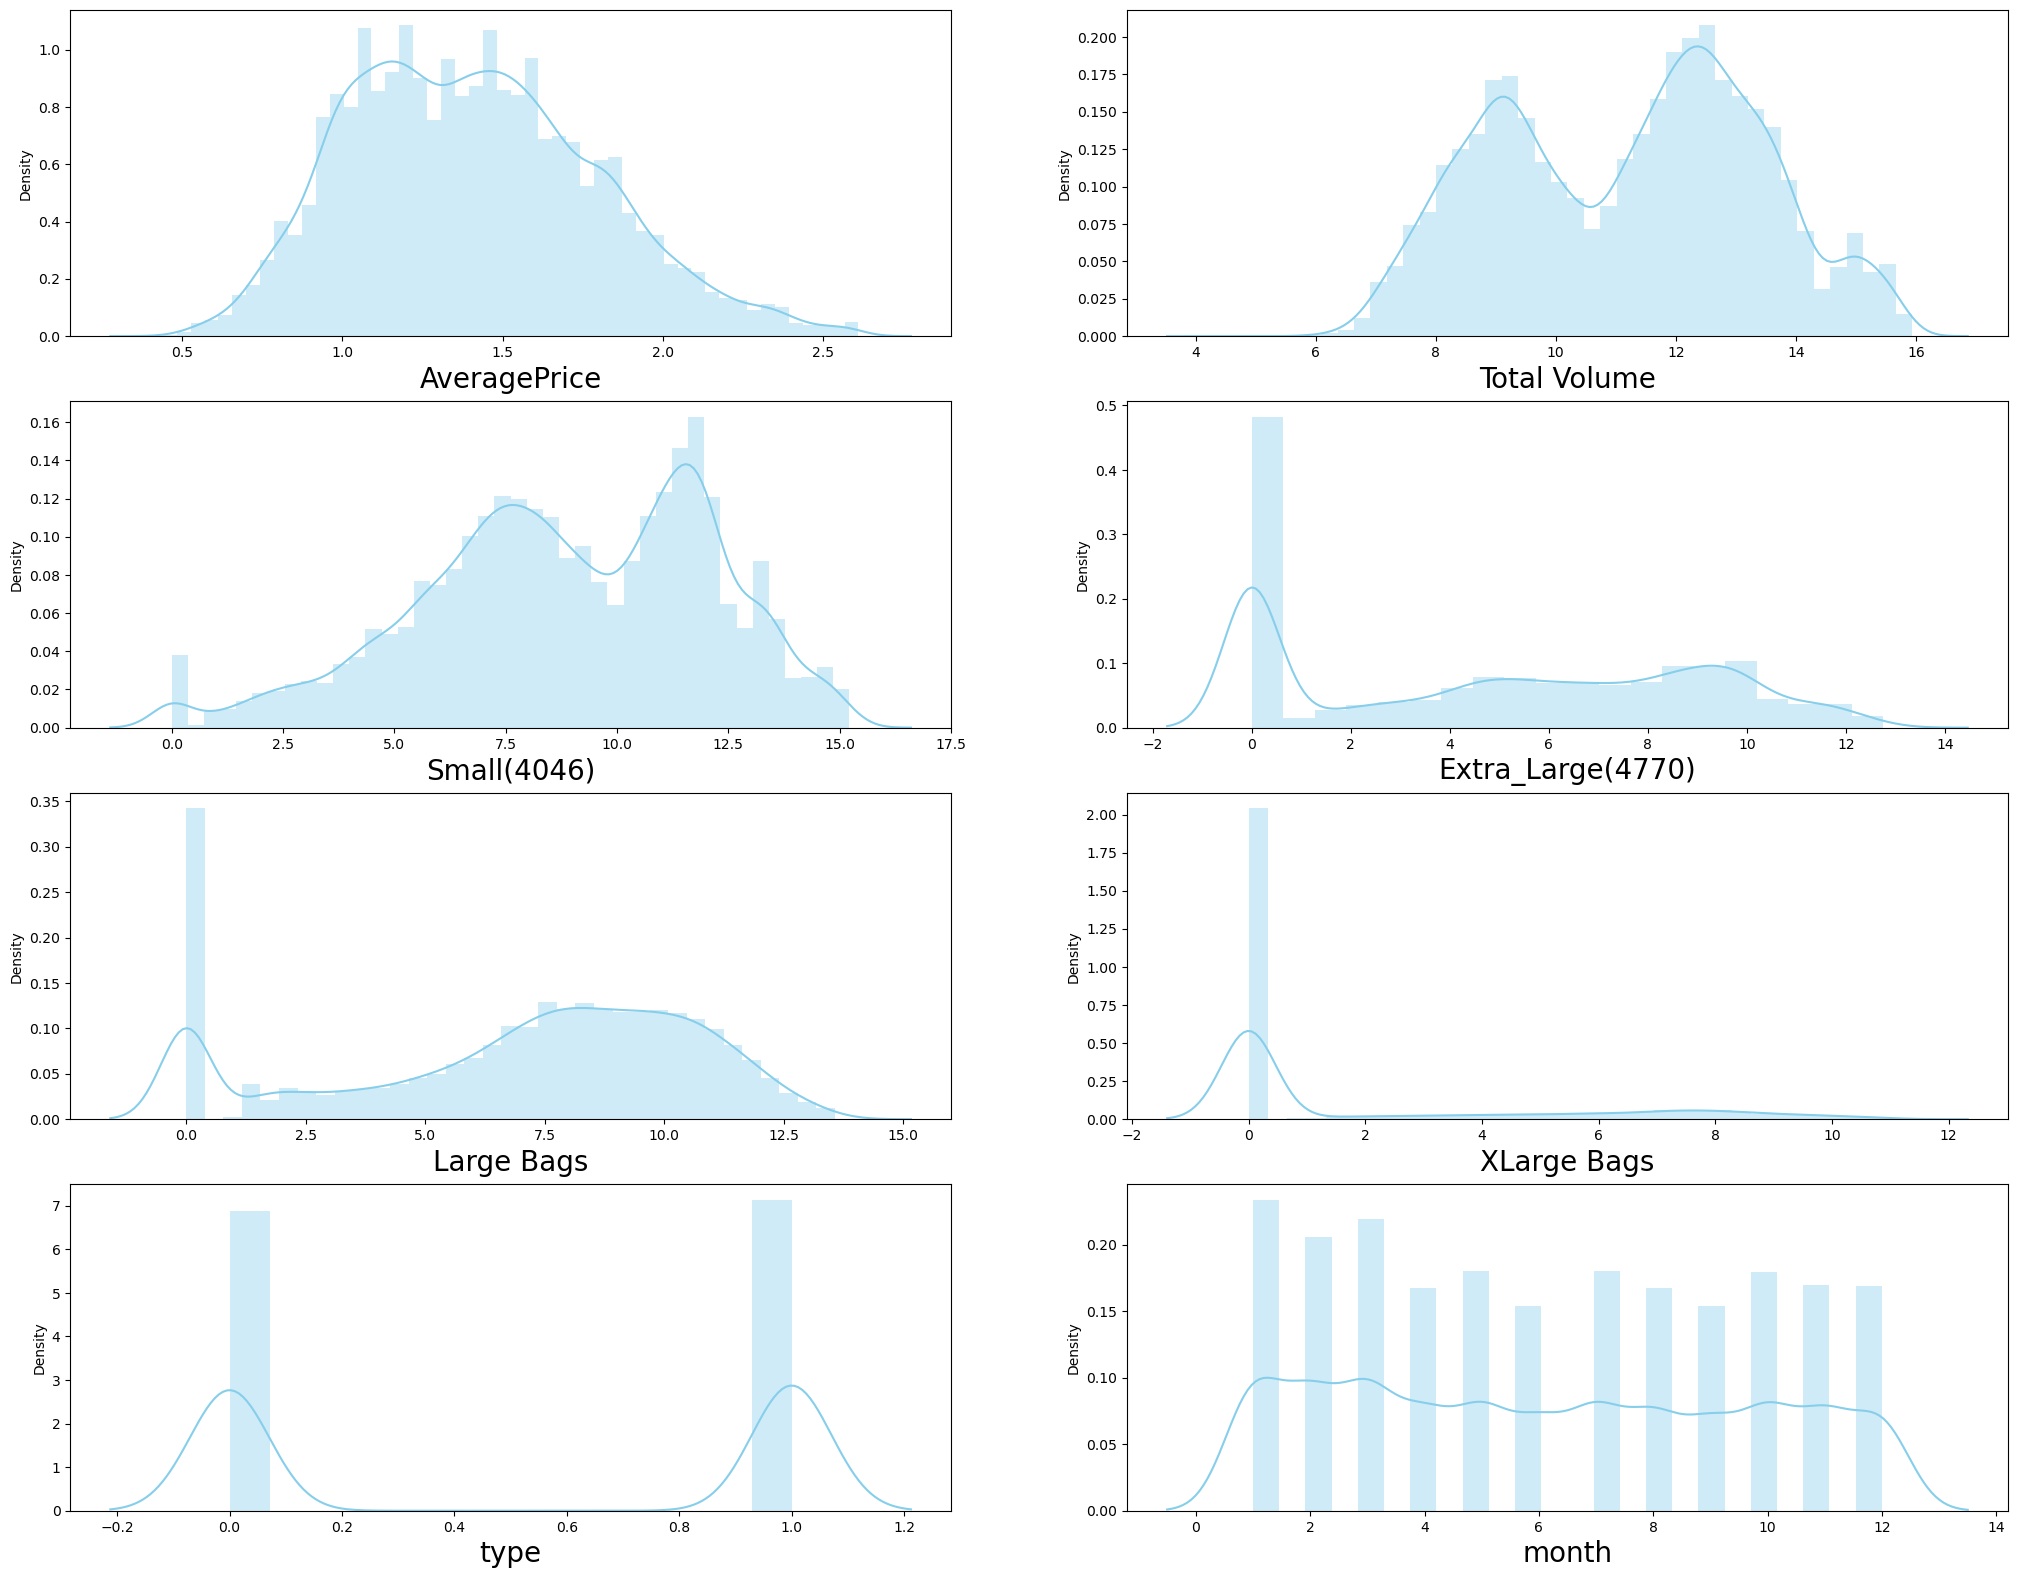

In [56]:
#Visualizing it
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

Data Splitting

In [57]:
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

Feature Scaling:

In [58]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Modelling Selection

In [59]:
# Writing Function to find best random state & R2 Score for each models
def max_r2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [60]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (xgb_model, 'XGBRegressor')
]

In [61]:
max_r2_score(LR_model, X, y)

(0.46573995432730664, 6)

In [62]:
max_r2_score(RD_model, X, y)

(0.4657392664834008, 6)

In [63]:
max_r2_score(Lasso_model, X, y)

(0, 0)

In [66]:
max_r2_score(DT_model, X, y)

(0.525451938155711, 23)

max_r2_score(SVR_model, X, y)

In [68]:
max_r2_score(KNR_model, X, y)

(0.7086434390806065, 27)

max_r2_score(RFR_model, X, y)

In [71]:
max_r2_score(SGH_model, X, y)

(0.46501978192987636, 6)

In [72]:
max_r2_score(Bag_model, X, y)

(0.7241321946038499, 11)

max_r2_score(GB_model, X, y)

In [ ]:
max_r2_score(xgb_model, X, y)

# HyperParameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define a reduced parameter grid with narrower ranges
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the Random Forest model and reduced parameter grid
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=79)

# Split the data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=79, test_size=0.20)

# Fit the model to find the best parameters
random_search.fit(train_x, train_y)  # Use the training data for fitting

# Get the best parameters from the Randomized Search
best_params = random_search.best_params_

# Create Random Forest regressor with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the Random Forest regressor on the full training data
best_rf.fit(X, y)  # Use the full dataset for training

# Make predictions on the test data
y_pred_rf = best_rf.predict(test_x)

# Evaluate the best model
r2_score_rf = r2_score(test_y, y_pred_rf)
print('Best R-squared Score (Random Forest):', r2_score_rf)


Best R-squared Score (Random Forest): 0.9385351212584294


Saving Best Model for Predicting AveragePrice

In [77]:
filename = 'AveragePrice_best_model.pkl'
pickle.dump(best_rf, open(filename, 'wb'))

# Prediction on the basis of Region

In [78]:
df1.head()

AveragePrice  Total Volume  Small(4046)  Large(4225)  Extra_Large(4770)  \
0          1.33      64236.62      1036.74     54454.85              48.16   
1          1.35      54876.98       674.28     44638.81              58.33   
2          0.93     118220.22       794.70    109149.67             130.50   
3          1.08      78992.15      1132.00     71976.41              72.58   
4          1.28      51039.60       941.48     43838.39              75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     0  2015       0     12   
1     9505.56     9408.07       97.49          0.0     0  2015       0     12   
2     8145.35     8042.21      103.14          0.0     0  2015       0     12   
3     5811.16     5677.40      133.76          0.0     0  2015       0     12   
4     6183.95     5986.26      197.69          0.0     0  2015       0     11   

   day  
0   27  
1   20  
2   13  
3    6  
4   29

Checking correlation with Target ('Region')

In [79]:
#correlation with target column
correlation_with_region = df1.corr()['region'].abs().sort_values(ascending=False)
print(correlation_with_region)


region               1.000000
Large Bags           0.127635
Small(4046)          0.119067
Extra_Large(4770)    0.095972
Total Bags           0.085892
Total Volume         0.076676
Small Bags           0.065976
XLarge Bags          0.044338
type                 0.018409
Large(4225)          0.011002
year                 0.004417
AveragePrice         0.003242
month                0.000119
day                  0.000046
Name: region, dtype: float64


In [80]:
# Dropping low correlated columns
df1.drop(columns=['day','month' ],axis=1, inplace=True)

In [81]:
#Checking shape after dropping the column
df1.shape

(17651, 12)

Checking Correlation

In [82]:
df1_corr = df1.corr()
df1_corr

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
AveragePrice           1.000000     -0.332056    -0.333577    -0.243988   
Total Volume          -0.332056      1.000000     0.876307     0.871592   
Small(4046)           -0.333577      0.876307     1.000000     0.565118   
Large(4225)           -0.243988      0.871592     0.565118     1.000000   
Extra_Large(4770)     -0.243465      0.647518     0.492127     0.620221   
Total Bags            -0.297323      0.912184     0.727981     0.757786   
Small Bags            -0.275771      0.905648     0.706800     0.778761   
Large Bags            -0.270915      0.640642     0.561060     0.451711   
XLarge Bags           -0.152669      0.513741     0.415432     0.392030   
type                   0.613150     -0.415476    -0.341376    -0.383138   
year                   0.091704     -0.004866    -0.034636    -0.040234   
region                -0.003242      0.076676     0.119067     0.011002   

                   Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
AveragePrice               -0.243465   -0.297323   -0.275771   -0.270915   
Total Volume                0.647518    0.912184    0.905648    0.640642   
Small(4046)                 0.492127    0.727981    0.706800    0.561060   
Large(4225)                 0.620221    0.757786    0.778761    0.451711   
Extra_Large(4770)           1.000000    0.557980    0.571512    0.323747   
Total Bags                  0.557980    1.000000    0.978213    0.746946   
Small Bags                  0.571512    0.978213    1.000000    0.593155   
Large Bags                  0.323747    0.746946    0.593155    1.000000   
XLarge Bags                 0.495976    0.581690    0.597700    0.296864   
type                       -0.321809   -0.378205   -0.367593   -0.286813   
year                       -0.082054    0.103442    0.086639    0.119543   
region                     -0.095972    0.085892    0.065976    0.127635   

                   XLarge Bags      type      year    region  
AveragePrice         -0.152669  0.613150  0.091704 -0.003242  
Total Volume          0.513741 -0.415476 -0.004866  0.076676  
Small(4046)           0.415432 -0.341376 -0.034636  0.119067  
Large(4225)           0.392030 -0.383138 -0.040234  0.011002  
Extra_Large(4770)     0.495976 -0.321809 -0.082054 -0.095972  
Total Bags            0.581690 -0.378205  0.103442  0.085892  
Small Bags            0.597700 -0.367593  0.086639  0.065976  
Large Bags            0.296864 -0.286813  0.119543  0.127635  
XLarge Bags           1.000000 -0.263734  0.108209 -0.044338  
type                 -0.263734  1.000000  0.003867  0.018409  
year                  0.108209  0.003867  1.000000 -0.004417  
region               -0.044338  0.018409 -0.004417  1.000000

function for those columns which are highly correlated with each other

In [83]:
correlation_threshold = 0.8
mask = df1_corr.abs() >= correlation_threshold
features_to_drop1 = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop1.add(colname_j)
                
features_to_drop1

{'Large(4225)', 'Small Bags', 'Small(4046)', 'Total Bags'}

In [84]:
df1.drop(columns=['Large(4225)', 'Small Bags', 'Small(4046)', 'Total Bags'],axis=1, inplace=True)

# Checking for Multicollinearity (VIF)

In [85]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF           Features
0  23.400574       AveragePrice
1   3.630627       Total Volume
2   2.139109  Extra_Large(4770)
3   2.018180         Large Bags
4   1.561434        XLarge Bags
5   3.595851               type
6  21.548592               year
7   4.087439             region

In [86]:
# vif of year is high so we will remove year for avoide multicollinearity
df1.drop(columns=['year'],axis=1, inplace=True)

Skewness

In [87]:
df1.skew()

AveragePrice         0.377432
Total Volume         3.767138
Extra_Large(4770)    5.117170
Large Bags           5.053434
XLarge Bags          6.135607
type                -0.037741
region               0.012798
dtype: float64

In [88]:
#Handling skewness by log method

for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

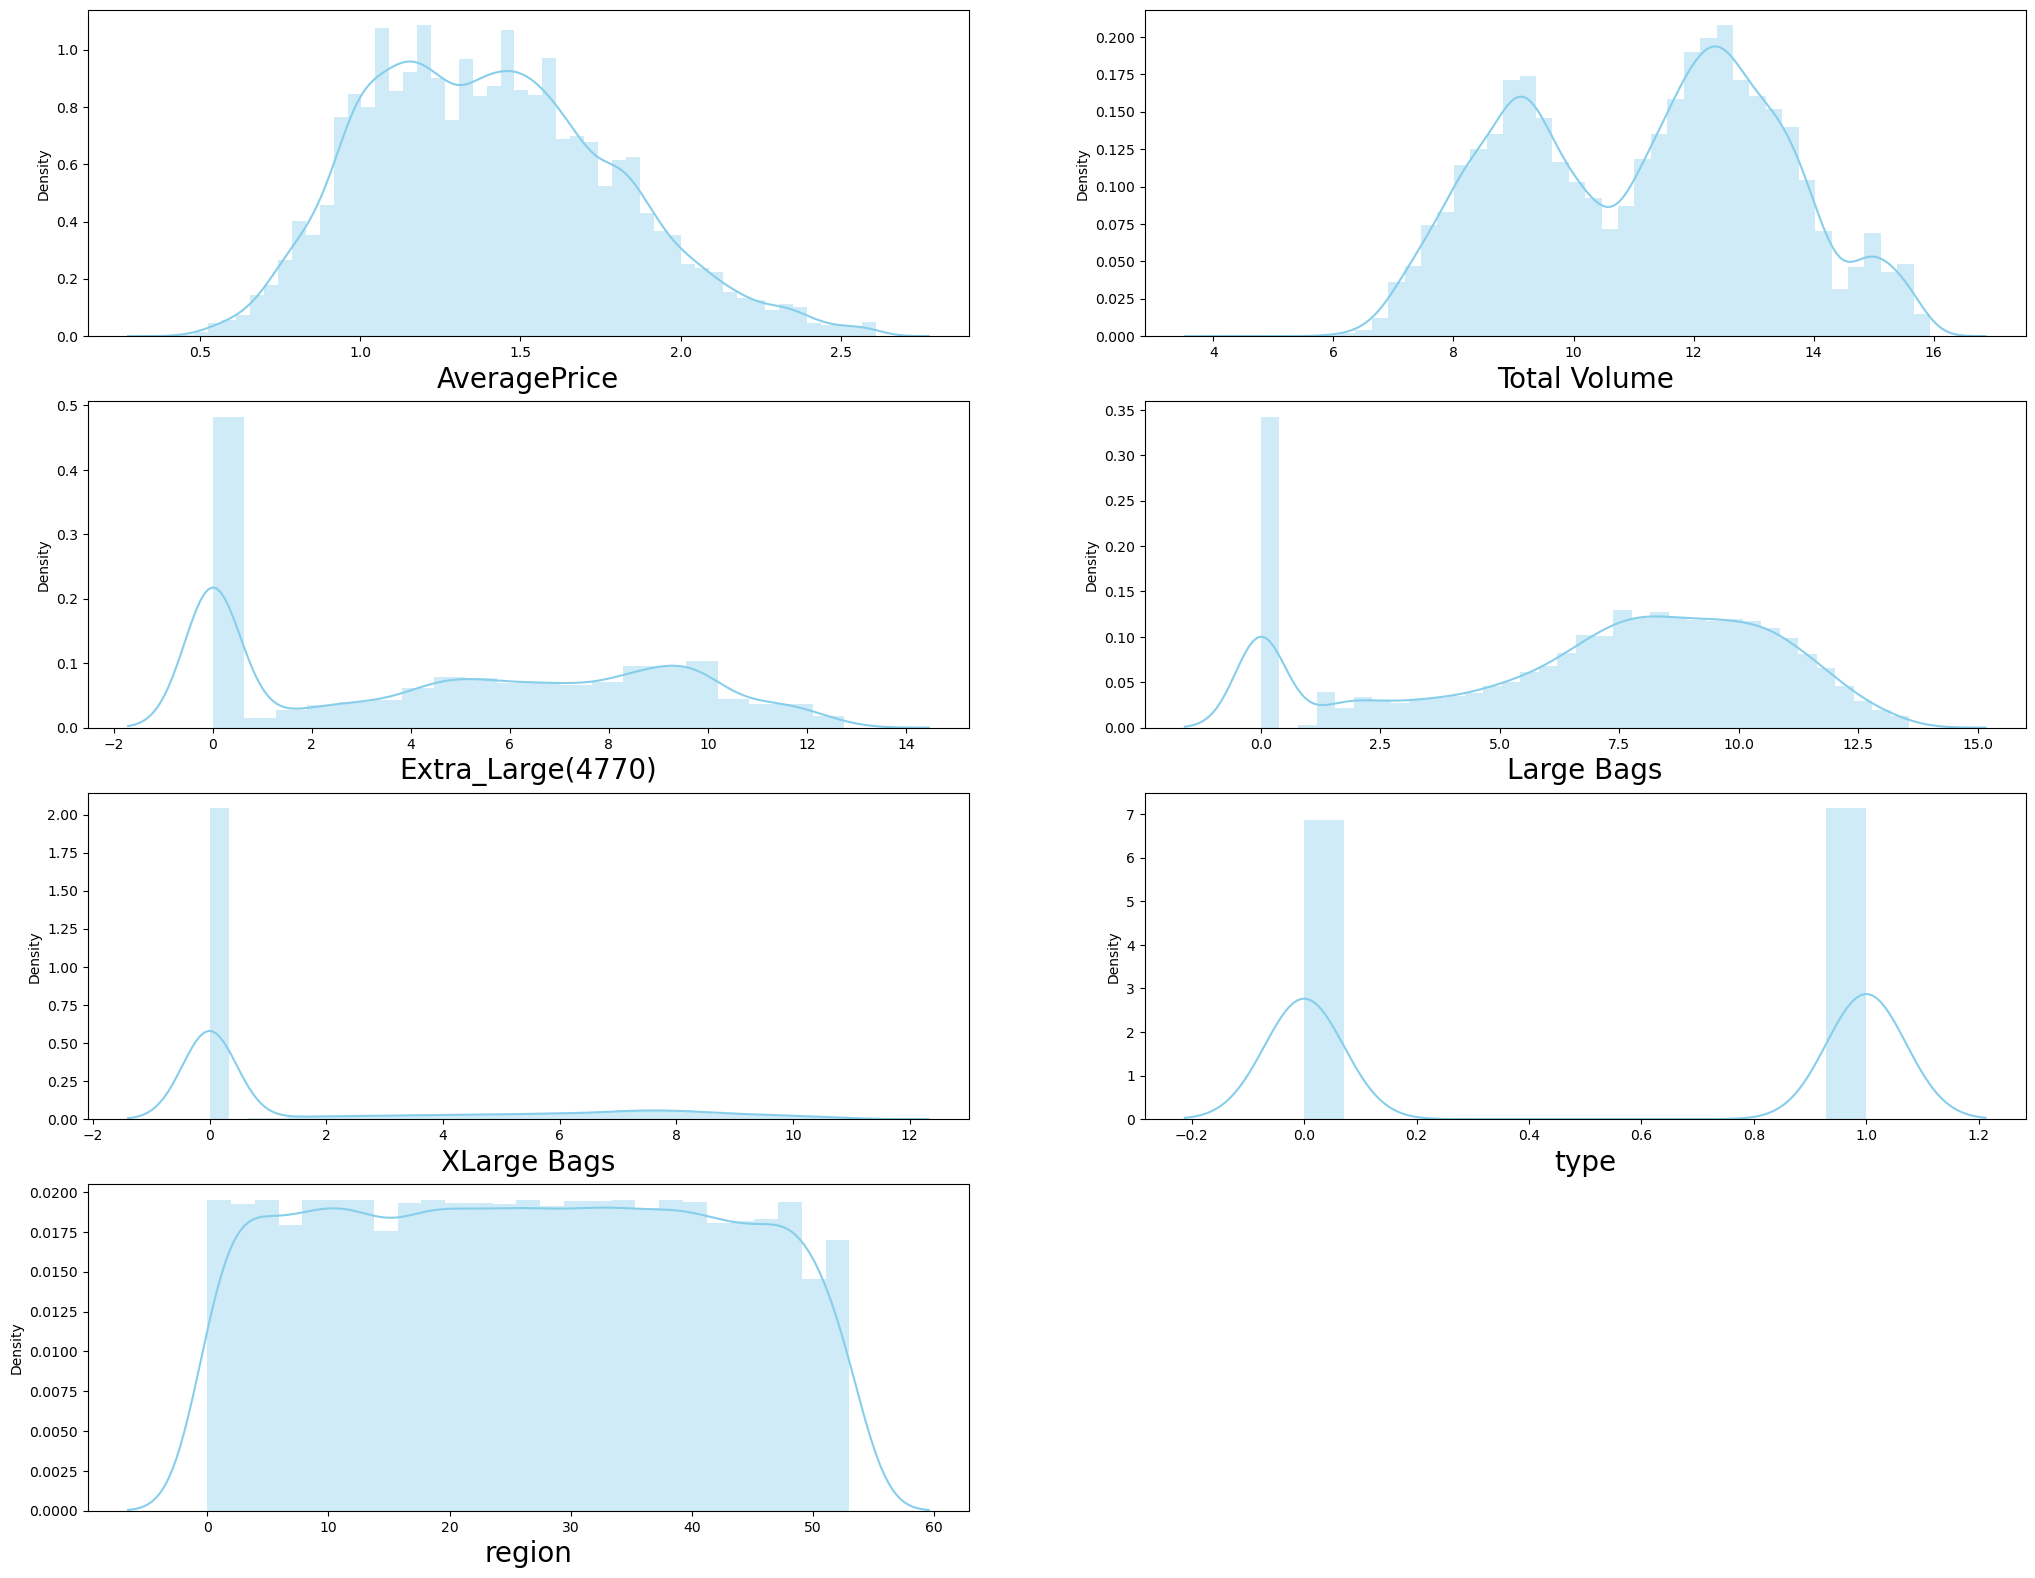

In [89]:
#vusualizing it
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

Data Splitting

In [90]:
X1 = df1.drop("region",axis=1)
y1 = df1["region"]

Feature Scaling:

In [91]:
ss=StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X1), columns=X1.columns)

Splitting Data for Train & Test

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.30,random_state=42)

In [93]:
# Initialize all the models
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (XGB_model, "XGBoost Classifier")
]

In [94]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, X1, y1, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }
    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
4   Random Forest Classifier                        0.412381  0.659177   
5         XGBoost Classifier                        0.395613  0.629154   
3     K-Neighbors Classifier                        0.358899  0.579305   
1   Decision Tree Classifier                        0.345078  0.539464   
2  Support Vector Classifier                        0.367737  0.486594   
0        Logistic Regression                        0.220270  0.300415   

   Precision    Recall  F1-Score  Support  \
4   0.662569  0.659177  0.658455   5296.0   
5   0.635455  0.629154  0.629693   5296.0   
3   0.590057  0.579305  0.579677   5296.0   
1   0.544195  0.539464  0.540176   5296.0   
2   0.513787  0.486594  0.478278   5296.0   
0   0.291519  0.300415  0.277798   5296.0   

                                    Confusion Matrix  
4  [[[46, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [[[49, 0, 0, 0, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [[[58, 0, 0, 0, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [[[38, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [[[76, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...  
0  [[[44, 0, 0, 1, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, ...

Hyper Parameter tuning

In [95]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV with the Random Forest classifier and parameter grid
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)

# Perform the Randomized Search on your training data to find the best hyperparameters
random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search_rf.best_params_
best_model = random_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.6608761329305136


Saving the best model

In [96]:
filename = 'Region_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))